# DIT243 Project - itp22104 / Anastasios Kotronis

# 1 - Δημιουργία συνθετικού κοινωνικού δικτύου με παρόμοια χαρακτηριστικά ενός πραγματικού δικτύου

Σύνδεσμοι αρχείων που θα χρησιμοποιηθούν στην εργασία
1. [konect](http://konect.cc/networks/moreno_lesmis/)
2. [Github - nodes](https://github.com/MADStudioNU/lesmiserables-character-network/blob/master/parsed_data/jean-complete-node.csv)
3. [Github - edges](https://github.com/MADStudioNU/lesmiserables-character-network/blob/master/parsed_data/jean-complete-edge.csv)

>This undirected network contains co-occurances of characters in _Victor Hugo_'s novel _Les Misérables_.  
A node represents a character and an edge between two nodes shows that these two characters appeared in the same chapter of the book.

Εισαγωγή αρχείων από το Google Drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

PROJECT_DIR = os.path.join(os.getcwd(), 'drive', 'MyDrive', 'DIT243', 'Project')
DATA_DIR = os.path.join(PROJECT_DIR, 'lesmiserables-data')
print(PROJECT_DIR)
print(DATA_DIR)

/content/drive/MyDrive/DIT243/Project
/content/drive/MyDrive/DIT243/Project/lesmiserables-data


In [2]:
edges_path = os.path.join(DATA_DIR, 'jean-complete-edge.csv')
nodes_path = os.path.join(DATA_DIR, 'jean-complete-node.csv')
print(edges_path)
print(nodes_path)

/content/drive/MyDrive/DIT243/Project/lesmiserables-data/jean-complete-edge.csv
/content/drive/MyDrive/DIT243/Project/lesmiserables-data/jean-complete-node.csv


Προεπισκόπιση των dependencies για το project

In [7]:
!cat {PROJECT_DIR}/requirements.txt

# ipykernel==6.22.0
networkx==3.2.1
scipy==1.12.0
# jgrapht==1.5.0.3
ndlib==5.1.1
matplotlib==3.8.3
bokeh==3.3.4
cmake==3.29.0.1
line-profiler==4.1.2

Εγκατάσταση dependencies

In [4]:
!pip install --upgrade pip
!pip install -r {PROJECT_DIR}/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.2/110.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 714.8/714.8 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11

In [4]:
import random
import time
from math import sqrt
from IPython.display import display as dspl
import warnings
warnings.filterwarnings('ignore')
#############################################################
%matplotlib inline
from scipy import stats
import seaborn as sns
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import copy
import random
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import ndlib.models.opinions as op
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
from ndlib.models.DiffusionModel import DiffusionModel
from ndlib.models.ModelConfig import Configuration
from statistics import mean
import collections

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from typing import List
from networkx.classes.graph import Graph
from functools import reduce
from random import choice

from matplotlib.font_manager import findfont, FontProperties
#############################################################
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community

Προεπισκόπιση των αρχείων nodes/edges


**Edges**

In [6]:
edges_df = pd.read_csv(edges_path).dropna()
dspl(edges_df.head())

,Source,Target,Type,Id,Label
0,MY,NP,Undirected,1,1.1.1
1,MB,MY,Undirected,2,1.1.1
2,ME,MY,Undirected,3,1.1.1
3,MB,ME,Undirected,4,1.1.1
4,HD,MY,Undirected,5,1.1.2


**Nodes**

In [7]:
nodes_df = pd.read_csv(nodes_path).dropna()
dspl(nodes_df.head())

,Id,Label,Description
0,TH,Thénardier,"Thénardier, innkeeper in Montfermeil, aka Jond..."
1,TG,Théodule,"Lieutenant Théodule Gillenormand, grandnephew ..."
2,TE,German teamster,German teamster
3,TC,Three concierges,"Three concierges, met by Gvaroche"
4,GV,Government troops,Government troops


## A. Οπτικοποιηση δικτύου les-miserables
1. Δημιουργία μη κατευθυνόμενου γράφου G
2. Οπτικοποίηση





In [8]:
G = nx.from_pandas_edgelist(edges_df, source="Source", target="Target", create_using=nx.Graph())
print("Number of vertices: {}".format(G.number_of_nodes()))
print("Number of edges: {}".format(G.number_of_edges()))

Number of vertices: 180
Number of edges: 488


<Figure size 640x480 with 0 Axes>

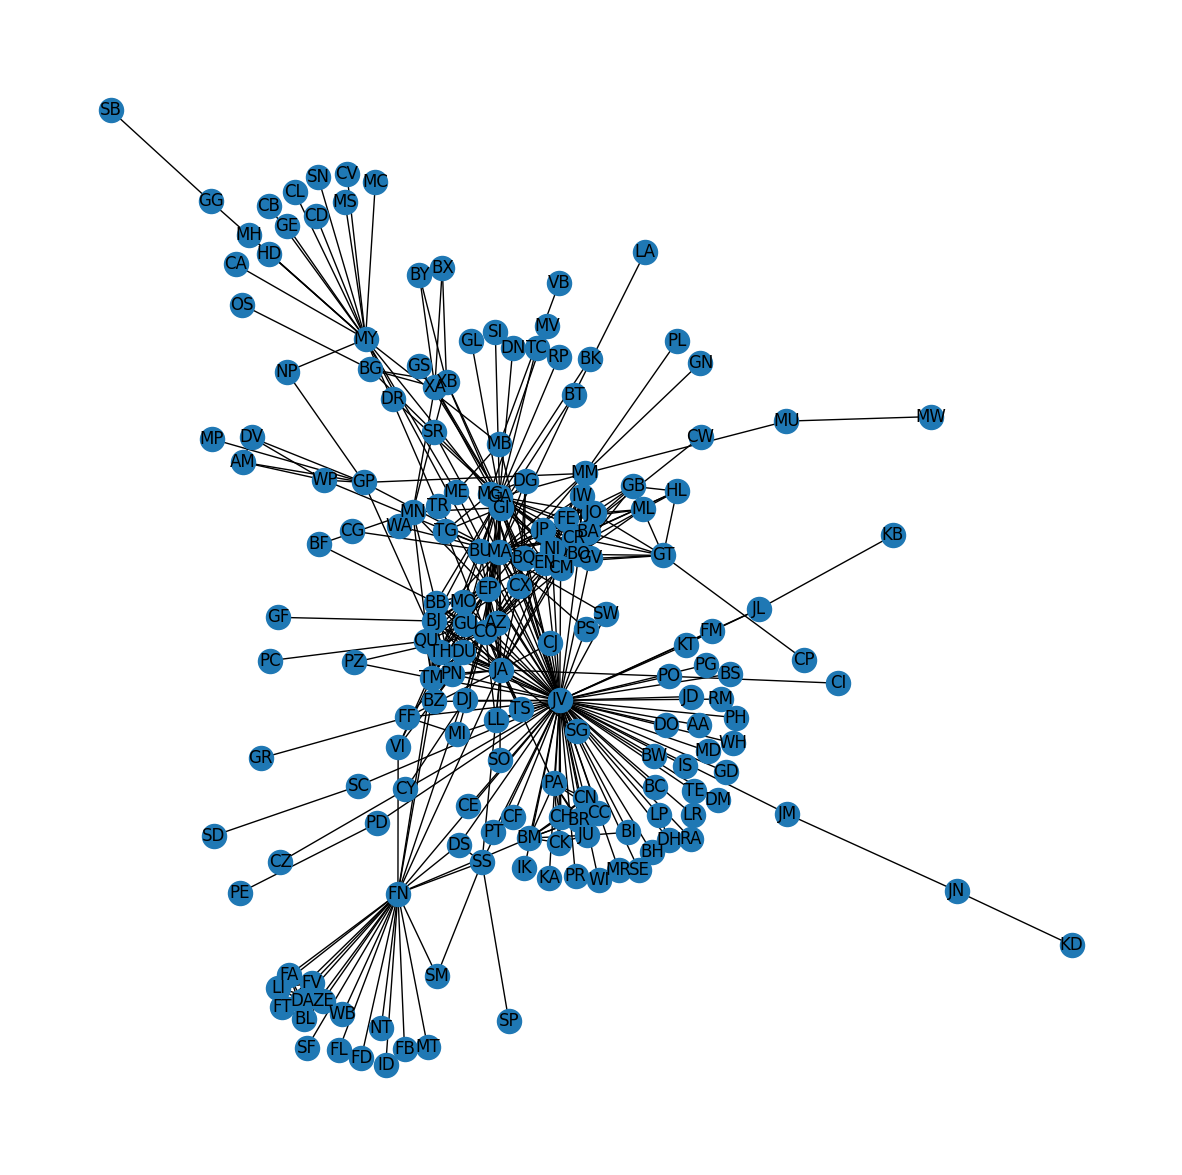

In [9]:
plt.clf()
plt.figure(figsize=(15, 15))
spund = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx(G, pos=spund)
plt.show()

In [10]:
print(f'Nodes: {G.nodes}')
print(f'Nodes count: {len(G.nodes)}')
print(f'Edges:')
print(G.edges)
print(f'Edges count: {len(G.edges)}')

print(f'Degrees:')
print(G.degree)

Nodes: ['MY', 'NP', 'MB', 'ME', 'HD', 'MG', 'MS', 'CL', 'GE', 'MC', 'CD', 'CA', 'MH', 'CB', 'CV', 'SN', 'VB', 'GG', 'SB', 'GD', 'JV', 'JL', 'KB', 'KT', 'FM', 'JD', 'PD', 'PE', 'MR', 'JM', 'MD', 'IS', 'PR', 'JN', 'KD', 'DO', 'TR', 'PG', 'PH', 'FT', 'LI', 'FA', 'BL', 'FV', 'DA', 'ZE', 'FN', 'WB', 'AZ', 'EP', 'TM', 'CO', 'TH', 'NT', 'DM', 'FF', 'JA', 'VI', 'SF', 'FD', 'FL', 'MT', 'FB', 'ID', 'BM', 'SG', 'DS', 'SP', 'SS', 'SC', 'SD', 'CI', 'PO', 'CE', 'BH', 'BW', 'WH', 'WI', 'IK', 'SE', 'TE', 'RM', 'PT', 'SM', 'LR', 'RA', 'BC', 'AA', 'BI', 'JU', 'CH', 'CK', 'PA', 'BR', 'CN', 'CC', 'GP', 'BZ', 'BS', 'GA', 'PZ', 'LP', 'DH', 'CF', 'LL', 'KA', 'SO', 'MI', 'GR', 'GI', 'MN', 'MV', 'TG', 'MA', 'BT', 'LA', 'WP', 'AM', 'MP', 'MM', 'DV', 'BO', 'CR', 'BA', 'CM', 'EN', 'GT', 'JO', 'PL', 'SR', 'BU', 'JP', 'PS', 'GU', 'QU', 'CG', 'PN', 'BJ', 'DU', 'BB', 'FE', 'CP', 'GF', 'BF', 'TS', 'MO', 'XA', 'XB', 'BG', 'GL', 'BK', 'BQ', 'MU', 'MW', 'GN', 'GS', 'RP', 'TC', 'OS', 'CW', 'HL', 'ML', 'GB', 'DN', 'PC', 'G

## B. Κατανομή
1. Βαθμοί κορυφών
2. Κατανομή βαθμών κορυφών








Προσθέτουμε στήλη για τους βαθμούς των κορυφών

In [11]:
nodes_df['Degree'] = nodes_df['Id'].map(G.degree)

dspl(nodes_df.head())

,Id,Label,Description,Degree
0,TH,Thénardier,"Thénardier, innkeeper in Montfermeil, aka Jond...",19
1,TG,Théodule,"Lieutenant Théodule Gillenormand, grandnephew ...",4
2,TE,German teamster,German teamster,1
3,TC,Three concierges,"Three concierges, met by Gvaroche",2
4,GV,Government troops,Government troops,13


### Β.1 Βασικά περιγραφικά μέτρα βαθμού κορυφών

Ακολουθεί ο υπολογισμός βασικών περιγραφικών μέτρων του γράφου

**Βαθμοί κορυφών**

Κορυφή με μέγιστο βαθμό

In [12]:
nodes_df_sorted = nodes_df.sort_values('Degree', ascending=False)
nodes_df_sorted.head()

,Id,Label,Description,Degree
160,JV,Jean Valjean,Jean Valjean,87
144,MA,Marius,Marius,35
25,GA,Gavroche,"Gavroche, son of the Thénardiers",33
169,JA,Javert,"Javert, police officer",29
80,CO,Cosette,"Cosette, daughter of Fantine",25


Η κορυφή **JV (Jean Valjean)** έχει το μέγιστο βαθμό: 87.  

Mέσος βαθμός βάρους κορυφών

In [13]:
mean_degree = nodes_df['Degree'].mean()
print(f'Mean degree: {mean_degree:.3f}')

Mean degree: 5.422


Διασπορά-Tυπική απόκλιση

In [14]:
var_degree = nodes_df['Degree'].var()
print(f'Degree Variance: {var_degree:.3f}')

std_degree = nodes_df['Degree'].std()
print(f'Degree Std: {std_degree:.3f}')

Degree Variance: 75.832
Degree Std: 8.708


Κατανομή Βαθμών

In [15]:
counts = nodes_df['Degree'].value_counts()
freqs = (100 * nodes_df['Degree'].value_counts(normalize=True)).apply(lambda x: '{:.3f}'.format(x))
dspl(pd.concat([counts, freqs], axis=1))

,count,proportion
Degree,,
1,76,42.222
2,20,11.111
3,16,8.889
7,15,8.333
4,8,4.444
8,6,3.333
5,5,2.778
9,4,2.222
15,4,2.222


Άλλα περιγραφικά μέτρα

In [16]:
nodes_df[['Degree']].describe()

,Degree
count,180.000000
mean,5.422222
std,8.708152
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,87.000000


### Β.2 Ιστογράμματα σχετικών συχνοτήτων-Εμπειρική κατανομή βαθμού κορυφών

Ιστογράμματα σχετικών συχνοτήτων των βαθμών

<Figure size 640x480 with 0 Axes>

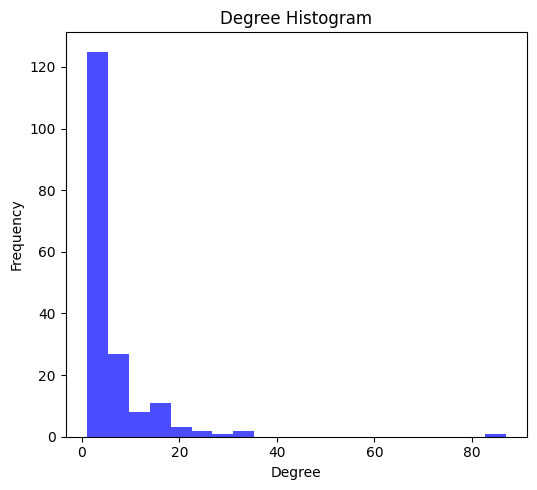

In [17]:
plt.clf()
bins = 20
# Plot histograms for degrees
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(nodes_df['Degree'], bins=bins, color='blue', alpha=0.7)
plt.title('Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

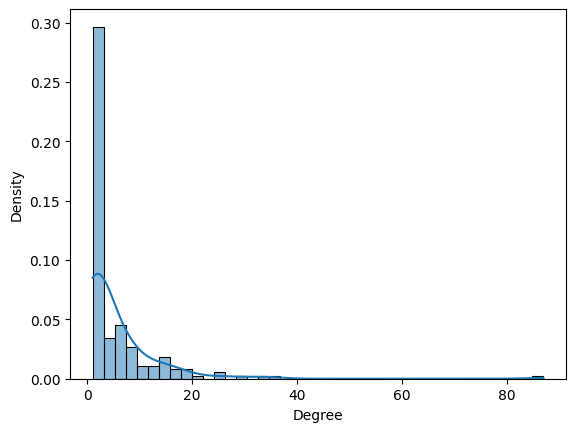

In [18]:
_ = sns.histplot(nodes_df['Degree'], kde=True, stat="density")

## Γ. Συνεκτικότητα

### Γ.1 'Ελεγχος συνεκτικότητας

In [20]:
print(nx.is_connected(G))

True


## Δ. Μέτρα κεντρικότητας & απόστασης

### Δ.1 Μέτρα κεντρικότητας

#### Nodes

**Closeness centrality** (Κεντρικότητα εγγύτητας): How fast information can spread from one node to every other node. How close a node is to all other nodes in the network.

In [19]:
nodes_df['Cntrl-Closeness'] = nodes_df['Id'].map(nx.closeness_centrality(G))

nodes_df_sorted = nodes_df.sort_values('Cntrl-Closeness', ascending=False)
nodes_df_sorted.head()

,Id,Label,Description,Degree,Cntrl-Closeness
160,JV,Jean Valjean,Jean Valjean,87,0.621528
169,JA,Javert,"Javert, police officer",29,0.489071
144,MA,Marius,Marius,35,0.482480
80,CO,Cosette,"Cosette, daughter of Fantine",25,0.478610
25,GA,Gavroche,"Gavroche, son of the Thénardiers",33,0.477333


Η κορυφή **JV (Jean Valjean)** έχει το μεγαλύτερο closeness centrality κάτι που είναι φανερό κι από την οπτοκοποίηση του γράφου αλλά είναι και αναμενόμενο καθώς είναι ο κύριος χαρακτήρας

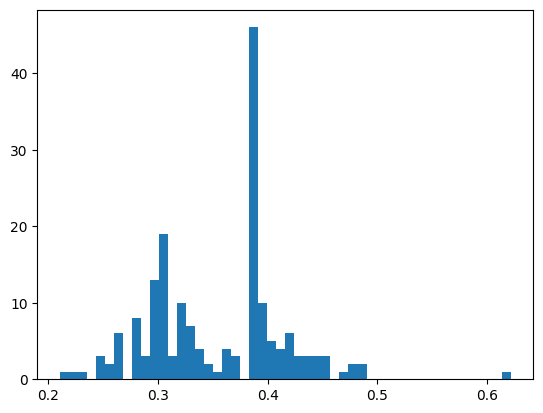

In [20]:
plt.hist(nodes_df['Cntrl-Closeness'].values, 50)
plt.show()

**Betweenness cetrality** (Κεντρικότητα ενδιαμεσότητας): The amount of influence a node has over the flow of information in a graph. Power in the transmission of information

In [21]:
nodes_df['Cntrl-Betweenness'] = nodes_df['Id'].map(nx.betweenness_centrality(G))

nodes_df_sorted = nodes_df.sort_values('Cntrl-Betweenness', ascending=False)
nodes_df_sorted.head()

,Id,Label,Description,Degree,Cntrl-Closeness,Cntrl-Betweenness
160,JV,Jean Valjean,Jean Valjean,87,0.621528,0.667555
35,FN,Fantine,"Fantine, mistress of Tholomyès",25,0.437653,0.168120
25,GA,Gavroche,"Gavroche, son of the Thénardiers",33,0.477333,0.147946
123,MY,Bishop Myriel,"M. Myriel, Bishop of Digne",18,0.420188,0.147235
144,MA,Marius,Marius,35,0.482480,0.107111


Η κορυφή **JV (Jean Valjean)** έχει το μεγαλύτερο betweenness centrality.

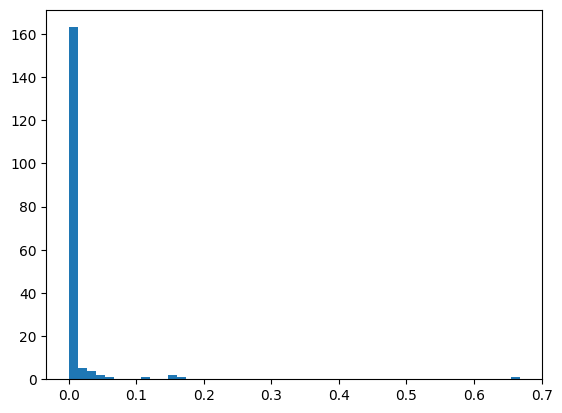

In [22]:
plt.hist(nodes_df['Cntrl-Betweenness'].values, 50)
plt.show()

**Degree centrality** (Βαθμός κεντρικότητας):The importance of a node within a graph
(Degree of a vertex /(n-1), for simple graphs)
High degree centrality: the vertex has large number of neighbors and is closely related to its neighbors)

In [23]:
nodes_df['Cntrl-Degree'] = nodes_df['Id'].map(nx.degree_centrality(G))

nodes_df_sorted = nodes_df.sort_values('Cntrl-Degree', ascending=False)
nodes_df_sorted.head()

,Id,Label,Description,Degree,Cntrl-Closeness,Cntrl-Betweenness,Cntrl-Degree
160,JV,Jean Valjean,Jean Valjean,87,0.621528,0.667555,0.486034
144,MA,Marius,Marius,35,0.482480,0.107111,0.195531
25,GA,Gavroche,"Gavroche, son of the Thénardiers",33,0.477333,0.147946,0.184358
169,JA,Javert,"Javert, police officer",29,0.489071,0.057108,0.162011
80,CO,Cosette,"Cosette, daughter of Fantine",25,0.478610,0.051486,0.139665


Η κορυφή **JV (Jean Valjean)** έχει το μεγαλύτερο degree centrality.

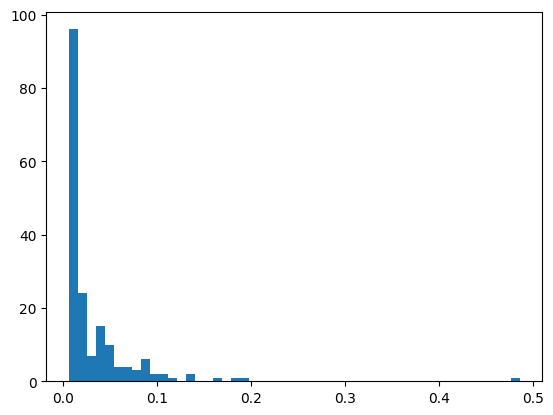

In [24]:
plt.hist(nodes_df['Cntrl-Degree'].values, 50)
plt.show()

**Eigenvector centrality**:  Identify nodes with influence over the whole network

In [25]:
nodes_df['Cntrl-EigenVector'] = nodes_df['Id'].map(nx.eigenvector_centrality(G))

nodes_df_sorted = nodes_df.sort_values('Cntrl-EigenVector', ascending=False)
nodes_df_sorted.head()

,Id,Label,Description,Degree,Cntrl-Closeness,Cntrl-Betweenness,Cntrl-Degree,Cntrl-EigenVector
160,JV,Jean Valjean,Jean Valjean,87,0.621528,0.667555,0.486034,0.360660
144,MA,Marius,Marius,35,0.482480,0.107111,0.195531,0.268033
25,GA,Gavroche,"Gavroche, son of the Thénardiers",33,0.477333,0.147946,0.184358,0.256475
169,JA,Javert,"Javert, police officer",29,0.489071,0.057108,0.162011,0.241171
80,CO,Cosette,"Cosette, daughter of Fantine",25,0.478610,0.051486,0.139665,0.218521


Η κορυφή **JV (Jean Valjean)** έχει το μεγαλύτερο eigenvector centrality.

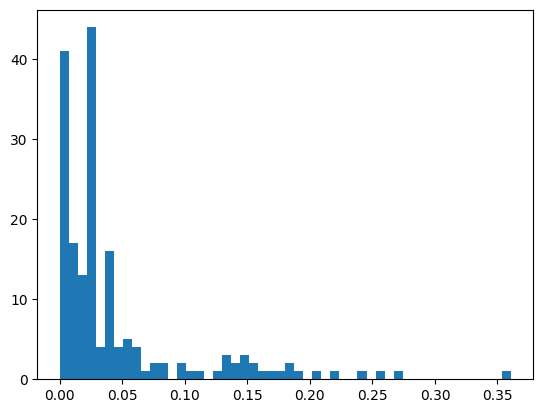

In [28]:
plt.hist(nodes_df['Cntrl-EigenVector'].values, 50)
plt.show()

#### Edges

**Betweenness centrality for edges**. Measures the extent to which that edge lies on the shortest paths between pairs of nodes.  
An edge with high betweenness centrality acts as a bridge that connects different parts of the network, facilitating communication or interaction between them

In [30]:
edge_cntrl = nx.edge_betweenness_centrality(G)
map_function = lambda r:edge_cntrl.get((r['Source'], r['Target'])) if (r['Source'], r['Target']) in edge_cntrl else edge_cntrl.get((r['Target'], r['Source']))
edges_df['Cntrl-Betweenness'] = edges_df[['Source', 'Target']].apply(lambda r:map_function(r), axis=1)

edges_df_sorted = edges_df.drop_duplicates(['Source', 'Target']).sort_values('Cntrl-Betweenness', ascending=False)
edges_df_sorted.head()

,Source,Target,Type,Id,Label,Cntrl-Betweenness
50,JV,MY,Undirected,51,1.2.3,0.129284
264,FN,JV,Undirected,265,1.5.13,0.095468
919,GA,JV,Undirected,920,4.4.2,0.076483
620,JV,MA,Undirected,621,3.6.1,0.043036
66,JM,JV,Undirected,67,1.2.6,0.032961


Heighest betweenness centrality for edge **(JV, MY)**

### Δ.2 Μέτρα απόστασης

**Eccentricity (Εκκεντρότητα)** (The maximum of its distances to other nodes)

In [31]:
nodes_df['Eccentricity'] = nodes_df['Id'].map(nx.eccentricity(G))

nodes_df_sorted = nodes_df.sort_values('Eccentricity', ascending=False)
dspl(nodes_df_sorted.head(2))
print(150 * '=')
nodes_df_sorted = nodes_df.sort_values('Eccentricity', ascending=True)
dspl(nodes_df_sorted.head(2))

,Id,Label,Description,Degree,Cntrl-Closeness,Cntrl-Betweenness,Cntrl-Degree,Cntrl-EigenVector,Eccentricity
154,KD,Door keeper,Door keeper at a Paris bindery,1,0.219363,0.0,0.005587,0.000097,7
32,SB,Shepherd boy,"Shepherd boy, serves G-- the conventionist",1,0.229487,0.0,0.005587,0.000148,7


,Id,Label,Description,Degree,Cntrl-Closeness,Cntrl-Betweenness,Cntrl-Degree,Cntrl-EigenVector,Eccentricity
0,TH,Thénardier,"Thénardier, innkeeper in Montfermeil, aka Jond...",19,0.468586,0.031973,0.106145,0.188342,4
47,EN,Enjolras,"Enjolras, chief of Friends of the ABC",20,0.456633,0.039795,0.111732,0.203494,4


**Διάμετρος**

The maximum distance between the pair of vertices

In [38]:
print(nx.diameter(G))

7


**Ακτίνα**

The minimum among all the maximum distances between a vertex to all other vertices is considered as the radius

In [37]:
print(nx.radius(G))

4


## Ε. Κλίκες-Τρίγωνα-Συσταδοποίηση

### Ε.1 Κλίκες-Τρίγωνα

In [32]:
cliques = sorted(list(nx.find_cliques(G)), key=lambda x:len(x), reverse=True)
print(len(cliques))

165


In [33]:
print(f'Max length: {max(map(len, cliques))}, min length: {min(map(len, cliques))}')

Max length: 11, min length: 2


In [34]:
cliques

[['JP', 'CR', 'EN', 'BA', 'FE', 'BO', 'GA', 'MA', 'JO', 'CM', 'GV'],
 ['JO', 'CR', 'EN', 'FE', 'BO', 'CM', 'MA', 'BA', 'GA', 'GV', 'MM'],
 ['JV', 'JA', 'TH', 'TM', 'PN', 'GU', 'BB', 'QU', 'DU', 'BJ'],
 ['JP', 'CR', 'EN', 'BA', 'FE', 'BO', 'GA', 'MA', 'CO'],
 ['JV', 'JA', 'TH', 'TM', 'EP', 'BJ', 'BB', 'QU', 'GU'],
 ['DA', 'FV', 'FN', 'ZE', 'FA', 'BL', 'LI', 'FT'],
 ['JV', 'CH', 'JU', 'BM', 'PA', 'CC', 'CN', 'BR'],
 ['JV', 'JA', 'TH', 'GA', 'EP', 'BJ', 'BB', 'GU'],
 ['JV', 'MO', 'EP', 'GU', 'BJ', 'BB', 'TH', 'GA'],
 ['JV', 'MO', 'EP', 'GU', 'BJ', 'BB', 'TH', 'QU'],
 ['JO', 'CR', 'EN', 'FE', 'BO', 'CM', 'MA', 'IW'],
 ['JV', 'JA', 'TH', 'GA', 'EP', 'CO', 'AZ'],
 ['JV', 'JA', 'TH', 'GA', 'EP', 'CO', 'MA'],
 ['JV', 'JA', 'TH', 'GA', 'EP', 'BJ', 'MA'],
 ['JV', 'JA', 'TH', 'TM', 'EP', 'CO', 'AZ'],
 ['JV', 'BO', 'EN', 'GA', 'MA', 'CM', 'GV'],
 ['GT', 'CR', 'BA', 'EN', 'JO', 'GV', 'BO'],
 ['GB', 'ML', 'EN', 'JO', 'FE', 'BO'],
 ['JV', 'BZ', 'PN', 'BJ', 'TH', 'DU'],
 ['JV', 'CH', 'JU', 'BM', 'PA',

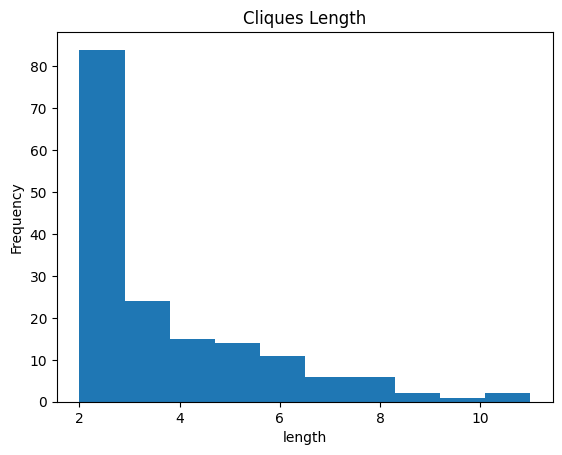

In [35]:
plt.hist(list(map(len, cliques)), 10)

plt.title('Cliques Length')
plt.xlabel('length')
plt.ylabel('Frequency')

plt.show()


**Τρίγωνα**

In [36]:
nodes_df['Triangles'] = nodes_df['Id'].map(nx.triangles(G))

nodes_df_sorted = nodes_df.sort_values('Triangles', ascending=False)
dspl(nodes_df_sorted.head())

,Id,Label,Description,Degree,Cntrl-Closeness,Cntrl-Betweenness,Cntrl-Degree,Cntrl-EigenVector,Eccentricity,Triangles
160,JV,Jean Valjean,Jean Valjean,87,0.621528,0.667555,0.486034,0.360660,4,173
144,MA,Marius,Marius,35,0.482480,0.107111,0.195531,0.268033,4,131
25,GA,Gavroche,"Gavroche, son of the Thénardiers",33,0.477333,0.147946,0.184358,0.256475,4,118
169,JA,Javert,"Javert, police officer",29,0.489071,0.057108,0.162011,0.241171,4,105
47,EN,Enjolras,"Enjolras, chief of Friends of the ABC",20,0.456633,0.039795,0.111732,0.203494,4,94


### Ε.2  Συσταδοποίηση

Υπολογισμός συντελεστών συσταδοποίησης του δικτύου και μέσος συντελεστής συσταδοποίησης

Set of **nodes** of minimum cardinality that if removed disconnect G

In [38]:
print(nx.minimum_node_cut(G))

{'MY'}


Set of **edges** of minimum cardinality that if removed disconnect G

In [37]:
print(nx.minimum_edge_cut(G))

{('DR', 'GA')}


Υπολογισμός συντελεστών συσταδοποίσης ανά κόμβο

In [39]:
nodes_df['Clustering'] = nodes_df['Id'].map(nx.clustering(G))

nodes_df_sorted = nodes_df.sort_values('Clustering', ascending=False)
dspl(nodes_df_sorted.head())

,Id,Label,Description,Degree,Cntrl-Closeness,Cntrl-Betweenness,Cntrl-Degree,Cntrl-EigenVector,Eccentricity,Triangles,Clustering
119,NI,Nicolette,"Nicolette, maid to Gillenormand",4,0.395143,0.0,0.022346,0.037268,5,6,1.0
23,SM,Hospital servant,Servant at the hospital in M-sur-M,2,0.305983,0.0,0.011173,0.009122,6,1,1.0
84,CK,Defense counsel,Counsel for the defense in Champmathieu's trial,5,0.387446,0.0,0.027933,0.035773,5,10,1.0
34,FT,Tholomyès,"Tholomyès, Parisian student, lover of Fantine",7,0.308090,0.0,0.039106,0.010017,6,21,1.0
114,BF,Babet's girlfriend,Babet's girlfriend,2,0.307033,0.0,0.011173,0.011669,5,1,1.0


Μέσος συντελεστής συσταδοποίησης

In [47]:
print(f'Average Clustering Coefficient: {nx.average_clustering(G)}')

Average Clustering Coefficient: 0.3994525813879189


### Ε.3 Πυκνότητα

Αναλογία των ήδη κλειστών τριγώνων σε σχέση με τα κλειστά τρίγωνα που θα μπορούσαν να υπάρχουν στο γράφο.

**Transitivity:** (Is based on the relative number of triangles in the graph, compared to total number of connected triples of nodes)

In [48]:
print(nx.transitivity(G))

0.28943543879262157


**Density:** (Measures whether the number of edges is close to the maximal number of edges)

In [49]:
print(nx.density(G))

0.030291744258224704


## ΣT. Σύγκριση με θεωρητικά μοντέλα τυχαίων γράφων

Σύγκριση του δικτύου με θεωρητικά μοντέλα τυχαίων και δυναμικών γράφων.

### ΣΤ.1 Barabasi-Albert Graph

Ορίζουμε συνάρτηση η οποία δημιουργεί υπογράφο από τον αρχικό γράφο με χρήση του **Breadth-first search** αλγορίθμου.

Ο υπογράφος δίνεται ως είσοδος στον generator του barabasi albert graph με σκοπό ο παραγόμενος γράφος να έχει κατά το δυνατόν όμοια χαρακτηριστικά με τον πραγματικό

In [40]:
def bfs_subgraph(graph, start_node, size_limit):
    visited = set()
    queue = [start_node]
    visited.add(start_node)

    while queue and len(visited) < size_limit:
        node = queue.pop(0)
        neighbors = list(graph.neighbors(node))

        # Shuffle neighbors to randomize traversal order
        random.shuffle(neighbors)
        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                if len(visited) >= size_limit:
                    break

    subgraph_nodes = visited
    subgraph = graph.subgraph(subgraph_nodes)
    return subgraph

Επιλέγουμε minimum `degree_threshold` και `size_limit` για τη δημιουργία του υπογράφου ώστε να επιλέξουμε κόμβους με μεγάλη επιρροή και τυχαίο starting node από όσους είναι πάνω από το threshold

In [70]:
degree_threshold = 70

# Limit for the subgraph
size_limit = 40

In [71]:
real_network = G

# Random high-degree node
high_degree_nodes = [node for node, degree in real_network.degree() if degree >= degree_threshold]
start_node = random.choice(high_degree_nodes)


# Create the subgraph using BFS
subgraph = bfs_subgraph(real_network, start_node, size_limit)
mapping = dict(zip(subgraph.nodes, range(len(subgraph.nodes))))
subgraph = nx.relabel_nodes(subgraph, mapping)

In [72]:
subgraph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39))

In [73]:
subgraph.edges

EdgeView([(0, 14), (0, 16), (0, 29), (0, 9), (0, 26), (0, 37), (0, 19), (1, 29), (2, 29), (3, 29), (4, 29), (4, 21), (4, 33), (4, 9), (5, 29), (6, 29), (7, 29), (7, 8), (7, 9), (8, 21), (8, 19), (8, 37), (8, 29), (8, 39), (8, 12), (8, 20), (8, 10), (8, 9), (8, 35), (8, 24), (9, 29), (9, 39), (9, 21), (9, 16), (9, 14), (9, 20), (9, 37), (9, 10), (9, 19), (9, 35), (10, 29), (11, 35), (11, 17), (11, 24), (11, 29), (12, 20), (12, 37), (12, 28), (12, 29), (13, 29), (13, 23), (14, 16), (14, 29), (15, 29), (16, 29), (17, 24), (17, 29), (18, 29), (19, 37), (19, 29), (19, 26), (20, 37), (20, 28), (20, 29), (21, 29), (21, 33), (22, 29), (23, 29), (24, 35), (24, 29), (25, 29), (26, 37), (26, 29), (27, 29), (28, 37), (28, 29), (29, 30), (29, 32), (29, 34), (29, 31), (29, 39), (29, 33), (29, 38), (29, 36), (29, 37), (29, 35)])

In [74]:
initial_graph = subgraph
BBA_G = nx.generators.random_graphs.barabasi_albert_graph(n=180, m=2, initial_graph=initial_graph)

Οπτικοποίηση του barabasi γράφου

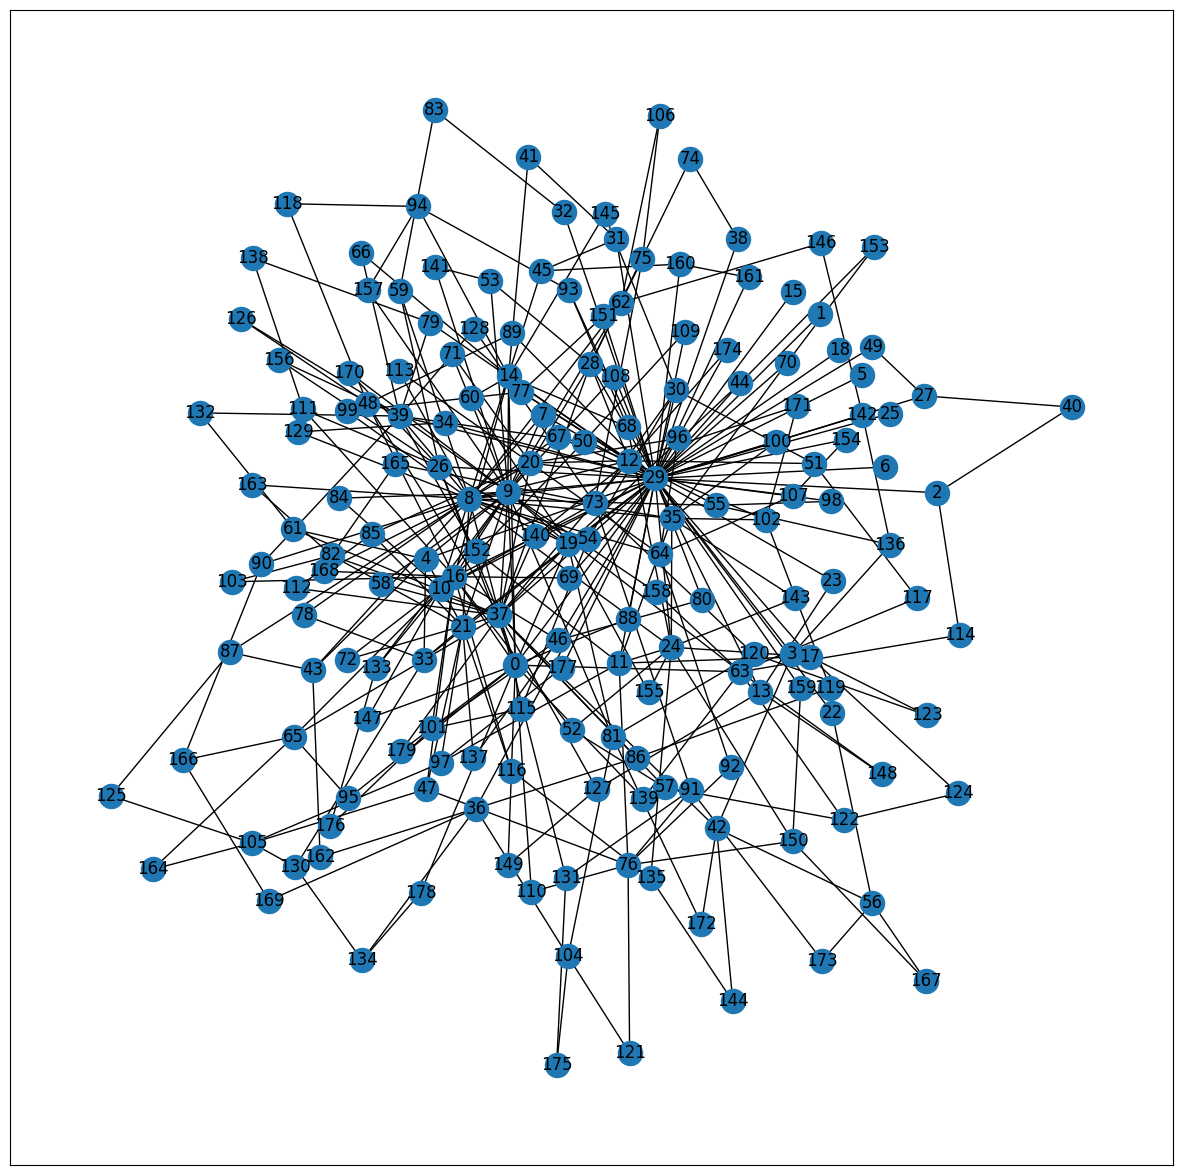

In [75]:
plt.figure(figsize=(15,15))
nx.draw_networkx(BBA_G)
plt.show()

### ΣΤ.2 Σύγκριση μετρικών

In [76]:
print(f'Is Barabasi-Albert Graph connected: {nx.is_connected(BBA_G)}')

Is Barabasi-Albert Graph connected: True


Βοηθητική συνάρτηση για τον υπολογισμό μετρικών

In [59]:
def metric_from_key_val(key_val, metric):
    return getattr(pd.Series(dict(key_val)), metric)()

Συνάρτηση εκτύπωσης μετρικών

In [48]:
def print_metrics(G):
    print(f'Nodes num: {len(G.nodes)}')
    print(f'Edges num: {len(G.edges)}')
    print(f'Degree Mean: {metric_from_key_val(G.degree, "mean"):.3f}')
    print(f'Degree Variance: {metric_from_key_val(G.degree, "var"):.3f}')
    print(f'SD: {metric_from_key_val(G.degree, "std"):.3f}')
    print(f'Radius: {nx.radius(G)}')
    print(f'Diameter: {nx.diameter(G)}')
    print(f'Average Clustering Coefficient: {nx.average_clustering(G):.3f}')
    print(f'Transitivity: {nx.transitivity(G):.3f}')
    print(f'Density: {nx.density(G):.3f}')

In [68]:
print(' Initial Graph '.center(100, '='))
print_metrics(G)

========================================== Initial Graph ===========================================
Nodes num: 180
Edges num: 488
Degree Mean: 5.422
Degree Variance: 75.832
SD: 8.708
Radius: 4
Diameter: 7
Average Clustering Coefficient: 0.399
Transitivity: 0.289
Density: 0.030


In [77]:
print(' Barabasi-Albert Graph '.center(100, '='))
print_metrics(BBA_G)

====================================== Barabasi-Albert Graph =======================================
Nodes num: 180
Edges num: 366
Degree Mean: 4.067
Degree Variance: 34.934
SD: 5.911
Radius: 3
Diameter: 6
Average Clustering Coefficient: 0.184
Transitivity: 0.082
Density: 0.023


The values of the two graphs are similar

In [78]:
concat_describe = pd.concat([nodes_df[['Degree']].describe(), pd.Series(dict(BBA_G.degree)).to_frame().describe()], axis=1)
concat_describe.columns = ['Degree Metrics-Initial', 'Degree Metrics-Barabasi']
concat_describe

,Degree Metrics-Initial,Degree Metrics-Barabasi
count,180.000000,180.000000
mean,5.422222,4.066667
std,8.708152,5.910506
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,7.000000,4.000000
max,87.000000,64.000000


Βοηθητική συνάρτηση απτοικοποίσης των μετρικών των δυο γράφων

In [80]:
def plot_side(metric, title):
    plt.figure(figsize=(10, 5))

    metric_attr = lambda g: getattr(g, metric) if hasattr(g, metric) else getattr(nx, metric)(g)
    plt.subplot(1, 2, 1)
    plt.hist(dict(metric_attr(G)).values(), bins=bins, color='blue', alpha=0.7)
    plt.title('Initial')

    plt.subplot(1, 2, 2)
    plt.hist(dict(metric_attr(BBA_G)).values(), bins=bins, color='red', alpha=0.7)
    plt.title('Barabasi')

    plt.suptitle(title)
    plt.show()

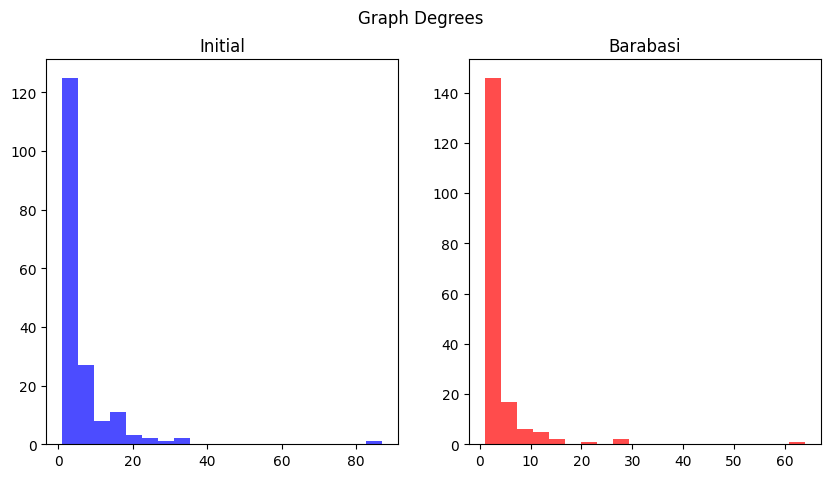

In [81]:
plot_side('degree', 'Graph Degrees')

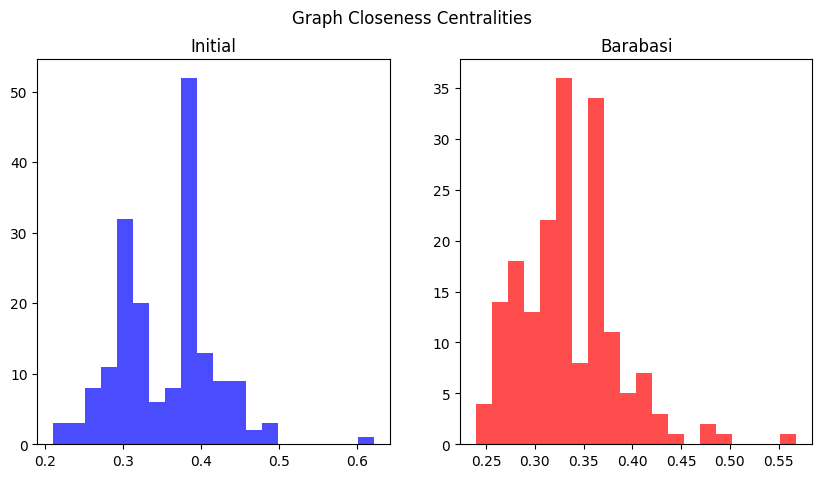

In [82]:
plot_side('closeness_centrality', 'Graph Closeness Centralities')

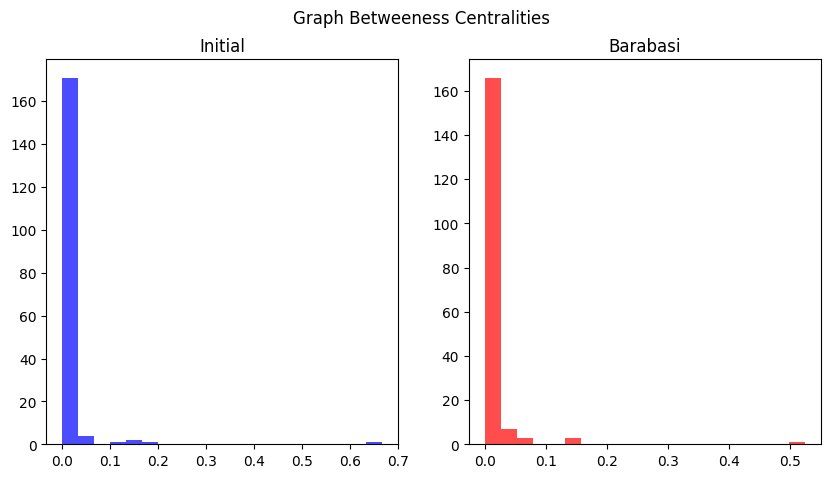

In [83]:
plot_side('betweenness_centrality', 'Graph Betweeness Centralities')

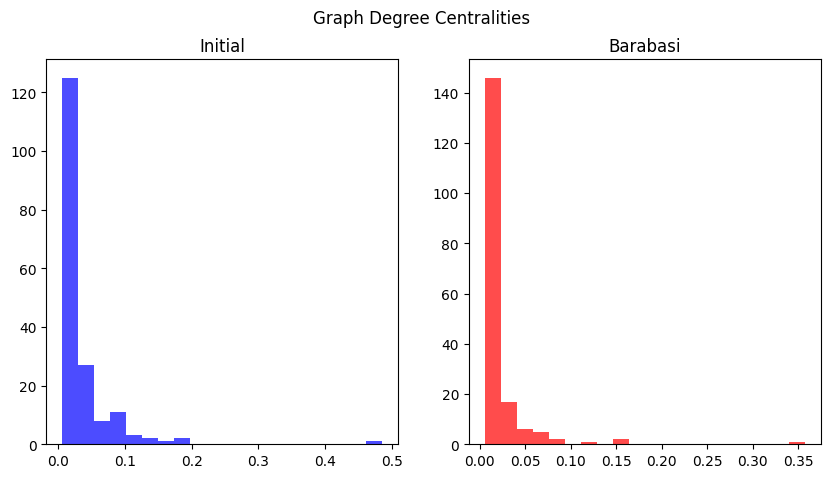

In [84]:
plot_side('degree_centrality', 'Graph Degree Centralities')

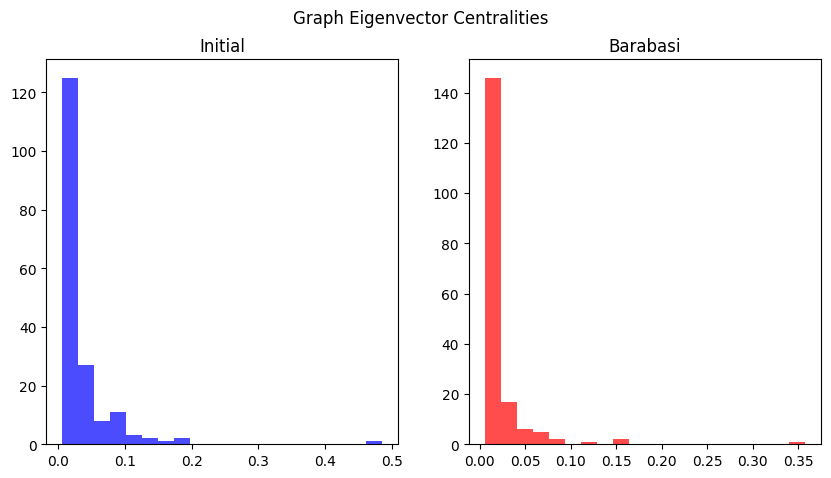

In [85]:
plot_side('degree_centrality', 'Graph Eigenvector Centralities')

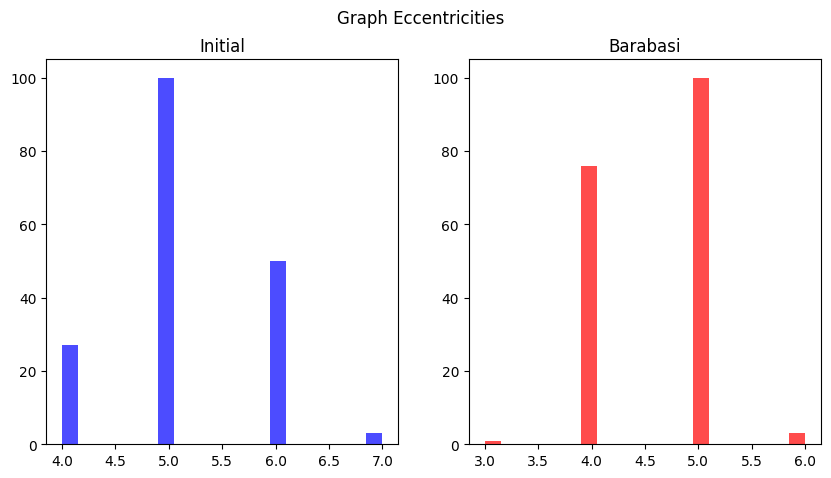

In [86]:
plot_side('eccentricity', 'Graph Eccentricities')

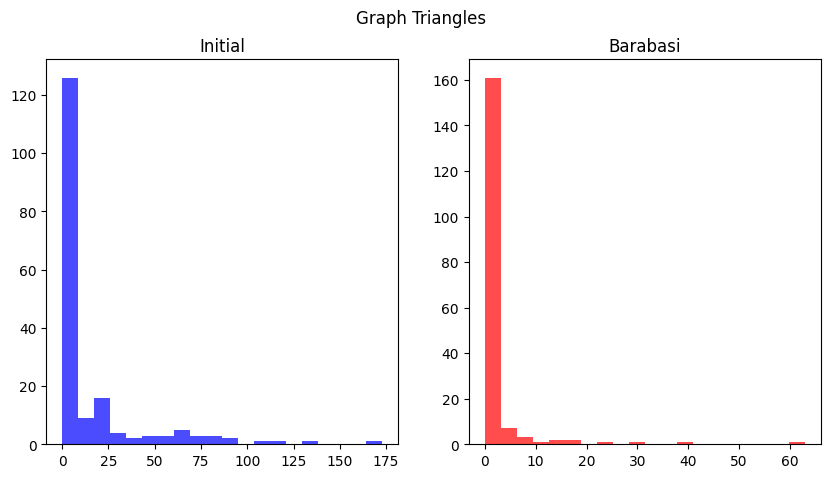

In [87]:
plot_side('triangles', 'Graph Triangles')

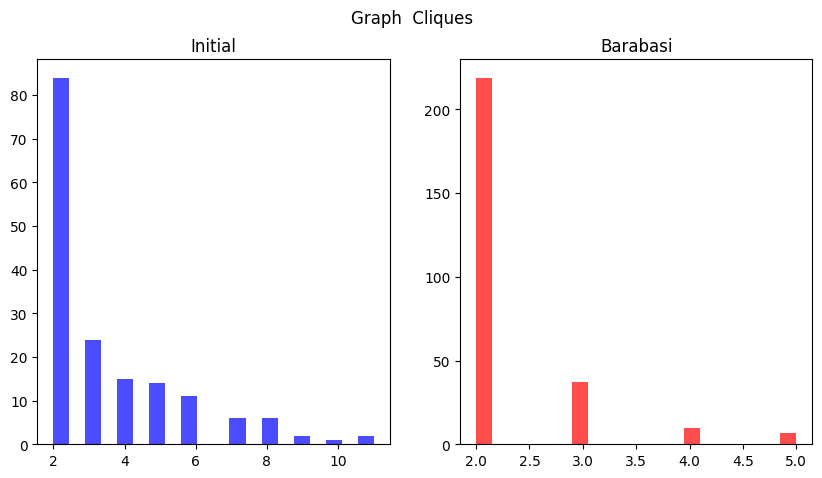

In [88]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(list(map(len, nx.find_cliques(G))), bins=bins, color='blue', alpha=0.7)
plt.title('Initial')

plt.subplot(1, 2, 2)
plt.hist(list(map(len, nx.find_cliques(BBA_G))), bins=bins, color='red', alpha=0.7)
plt.title('Barabasi')

plt.suptitle('Graph  Cliques')
plt.show()

# 2 - Αλγόριθμοι πρόβλεψης ακμών

In [89]:
import random
from statistics import mean
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Υπογίζουμε τα συμπληρώματα των γράφων

In [90]:
G_comp = nx.complement(G)
BBA_G_comp = nx.complement(BBA_G)

In [93]:
def common_neighbors(G, title=''):
    common_neighbors, cn_similarity = {}, {}
    for u, v in G.edges:
        _common_neighbors = list(nx.common_neighbors(G, u, v))
        common_neighbors[u,v] = _common_neighbors
        cn_similarity[u,v] = len(_common_neighbors)
    print(f' {title} '.center(50, '='))
    print('Mean:', metric_from_key_val(cn_similarity, "mean"))
    print('SD:', metric_from_key_val(cn_similarity, "std"))
    print('Max:', metric_from_key_val(cn_similarity, "max"))
    print('Min:', metric_from_key_val(cn_similarity, "min"))
    print()
    _ = plt.hist(cn_similarity.values(), 50)
    plt.xlabel('Number of Common Neighbors')
    plt.ylabel('Frequency')
    plt.title(f'Common Neighbors - {title}')
    return common_neighbors

================= Initial Graph ==================
Mean: 5.305327868852459
SD: 4.379227179891749
Max: 25
Min: 0



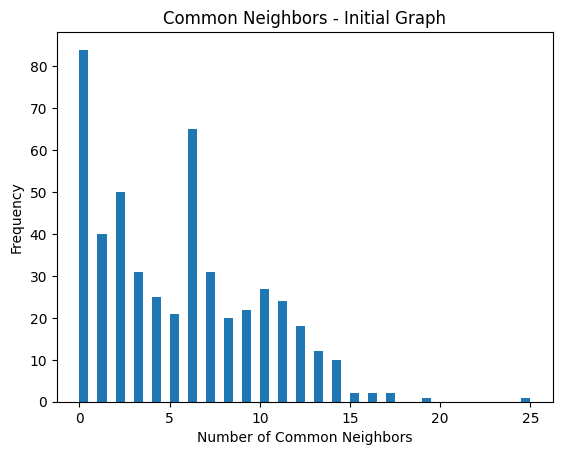

In [94]:
G_common_neighbors = common_neighbors(G, 'Initial Graph')

=========== Initial Graph - Complement ===========
Mean: 168.431314812444
SD: 9.949323617470391
Max: 177
Min: 81



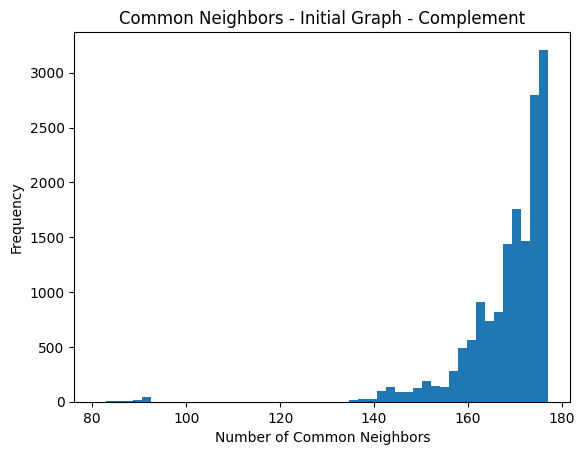

In [95]:
G_comp_common_neighbors = common_neighbors(G_comp, 'Initial Graph - Complement')

We see that the complement graph has a lot more edges so we experiment with
the sample of the complement graph that we will use for the training.

In [96]:
print(len(G.edges()))
print(len(G_comp.edges()))

488
15622


After checking several values we see that using 10 times the number of the
initial graph as sample size we get good metrics

In [99]:
TIMES_INITIAL_G_EDGES = 10

# Καθορισμός αγορίθμου πρόβλεψης ακμών

We define a function that creats the data we will use for train, combining the initial graph and the complement

We use the _resource_allocation_index_ as feature and _1,0_ as label for whether
the edge is from the initial graph or the complement respectively

In [105]:
def make_data(G, G_comp, comp_factor=1):
    G_edges, G_comp_edges = G.edges(), G_comp.edges()
    data = {}
    for edge in G_edges:
        rai = nx.resource_allocation_index(G,[edge])
        ra_sim = next(iter(rai))[-1]
        data[ra_sim] = 1

    G_comp_sample_size = int(comp_factor * len(G_edges))
    G_comp_sample = random.sample(G_comp_edges, G_comp_sample_size)
    for edge in G_comp_sample:
        rai = nx.resource_allocation_index(G,[edge])
        ra_sim = next(iter(rai))[-1]
        data[ra_sim] = 0

    return data

Helper function to convert data to numpy arrays

In [87]:
def to_np_array(data):
    X_data = np.array([[x] for x in list(data.keys())])
    y_data = np.array(list(data.values()))
    return X_data, y_data

Define a function that performs the k-fold validation with _Logistic Regression_

In [97]:
def kfold_log_regression(X_data, y_data):
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    model = LogisticRegression()
    accs, precs, recs = [], [], []
    for iter_, (train_index, test_index) in enumerate(kfold.split(X_data, y_data), 1):
        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = metrics.accuracy_score(y_test, y_pred)
        prec = metrics.precision_score(y_test, y_pred)
        rec = metrics.recall_score(y_test, y_pred)
        accs.append(acc); precs.append(prec); recs.append(rec);

        print(f' ITERATION {iter_} '.center(80, '='))
        print('Accuracy:', acc)
        print('Precision:', prec)
        print('Recall:', rec)
        print()
        fig, ax = plt.subplots(figsize=(8,6))
        cm = metrics.confusion_matrix(y_test, y_pred)
        cmp = metrics.ConfusionMatrixDisplay(cm)
        cmp.plot(ax=ax)
        plt.show()
        print()
    print('AVG Accuracy:', mean(accs))
    print('AVG Precision:', mean(precs))
    print('AVG Recall:', mean(recs))

## Αξιολόγηση αλγορίθμου πρόβλεψης ακμών

Evaluate the algorithm with the real graph

In [102]:
G_data = make_data(G, G_comp, TIMES_INITIAL_G_EDGES)
X_data_G, y_data_G = to_np_array(G_data)

================================= ITERATION 1 ==================================
Accuracy: 0.8918918918918919
Precision: 0.896551724137931
Recall: 0.9629629629629629



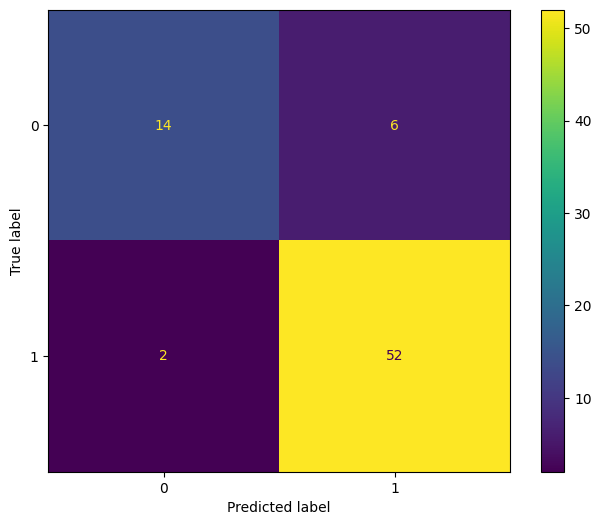


================================= ITERATION 2 ==================================
Accuracy: 0.8513513513513513
Precision: 0.8909090909090909
Recall: 0.9074074074074074



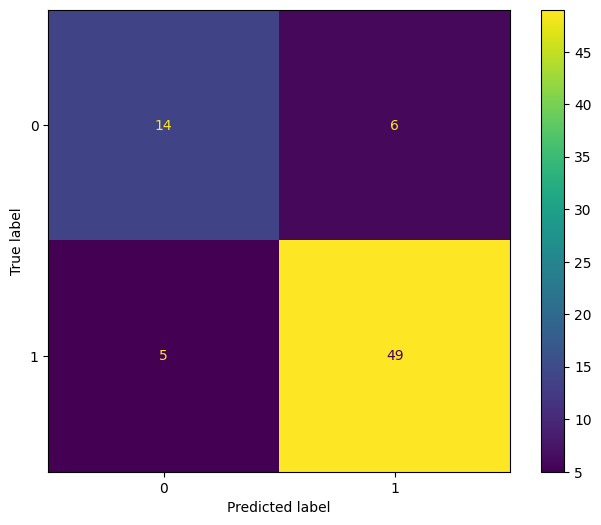


================================= ITERATION 3 ==================================
Accuracy: 0.8082191780821918
Precision: 0.8
Recall: 0.9811320754716981



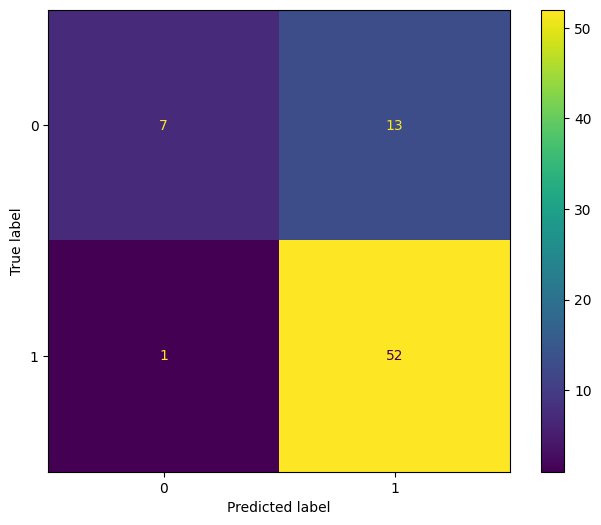


================================= ITERATION 4 ==================================
Accuracy: 0.8356164383561644
Precision: 0.8620689655172413
Recall: 0.9259259259259259



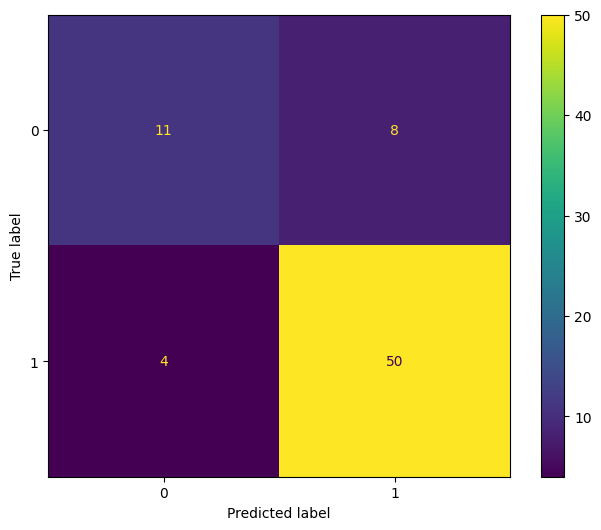


================================= ITERATION 5 ==================================
Accuracy: 0.8493150684931506
Precision: 0.8771929824561403
Recall: 0.9259259259259259



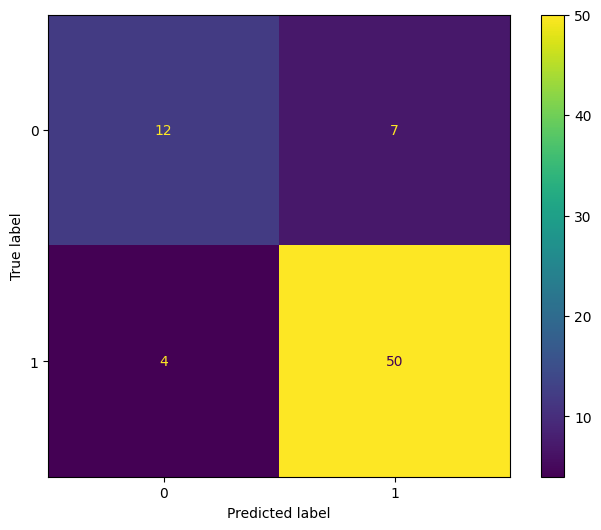


AVG Accuracy: 0.84727878563495
AVG Precision: 0.8653445526040807
AVG Recall: 0.940670859538784


In [103]:
kfold_log_regression(X_data_G, y_data_G)

Evaluate the algorithm with the synthetic graph

In [97]:
print(len(BBA_G.edges()))
print(len(BBA_G_comp.edges()))

366
15744


Similrly, after checking several values we see that using 3 times the number of the initial graph as sample size for the complement we get good metrics

In [134]:
TIMES_INITIAL_BBA_G_EDGES = 3

In [135]:
BBA_G_data = make_data(BBA_G, BBA_G_comp, TIMES_INITIAL_BBA_G_EDGES)
X_data_BBA_G, y_data_BBA_G = to_np_array(BBA_G_data)

================================= ITERATION 1 ==================================
Accuracy: 0.75
Precision: 0.7894736842105263
Recall: 0.7894736842105263



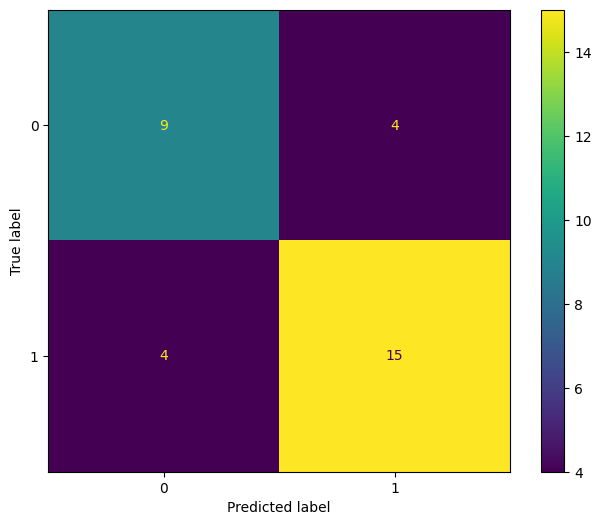


================================= ITERATION 2 ==================================
Accuracy: 0.8125
Precision: 0.8095238095238095
Recall: 0.8947368421052632



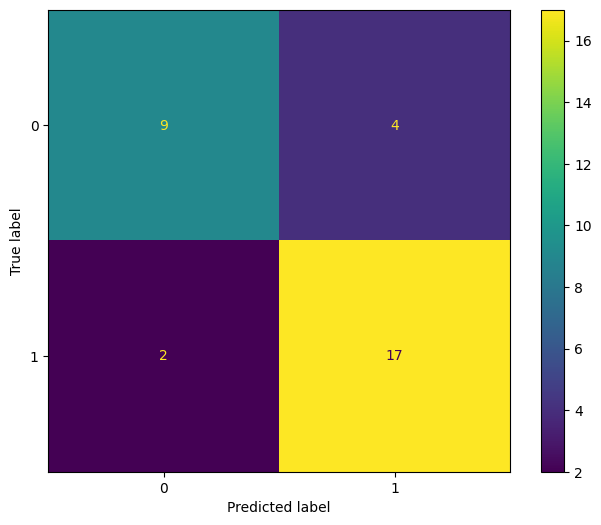


================================= ITERATION 3 ==================================
Accuracy: 0.78125
Precision: 0.9285714285714286
Recall: 0.6842105263157895



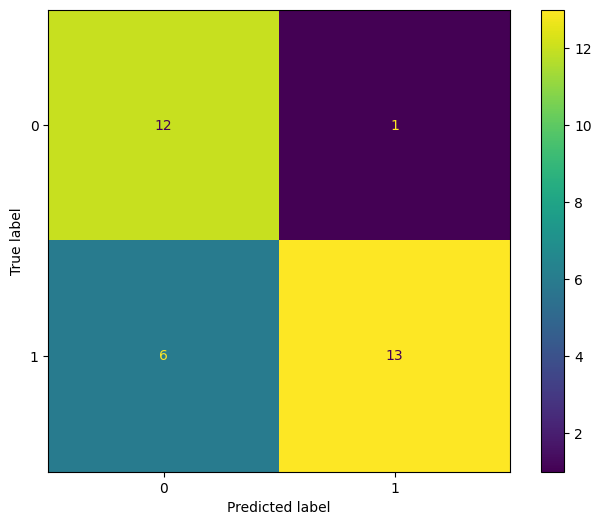


================================= ITERATION 4 ==================================
Accuracy: 0.8125
Precision: 0.8421052631578947
Recall: 0.8421052631578947



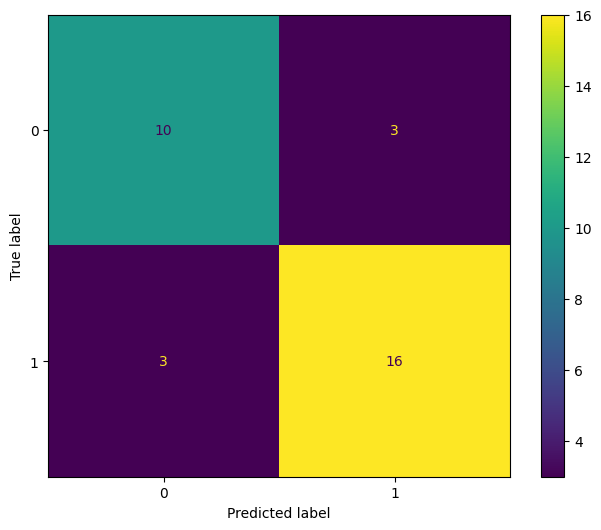


================================= ITERATION 5 ==================================
Accuracy: 0.9032258064516129
Precision: 0.8571428571428571
Recall: 1.0



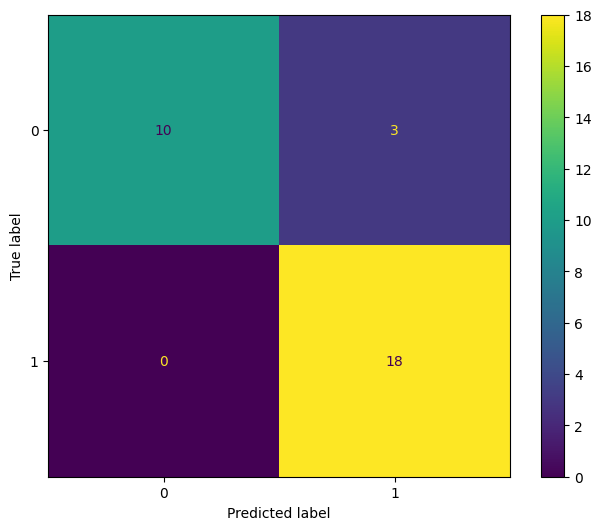


AVG Accuracy: 0.8118951612903226
AVG Precision: 0.8453634085213032
AVG Recall: 0.8421052631578947


In [136]:
kfold_log_regression(X_data_BBA_G, y_data_BBA_G)

Comparing the results on the real and the synthetic graph we see very similar numbers for Accuracy and Precision and a somewhat bigger difference in Recall
(0.940 vs 0.842)

## Εντοπισμός κλικών

We utilize **Girvan-Newman** algorithm considering results with communities up to a threshold

In [119]:
import itertools
import networkx.algorithms.community as community

Function to detect communities given  a graph and a threshold

In [121]:
communities_up_to = 5

In [135]:
def detect_communities(G, communities_up_to=communities_up_to):
    comp = community.girvan_newman(G)
    limited_communities = list(itertools.takewhile(lambda c: len(c) <= communities_up_to, comp))
    for communities in limited_communities:
        print(len(communities), tuple(sorted(c) for c in communities))
    return limited_communities

Function to plot communities of a graph

In [123]:
def plot_communities(G, communities, title=''):
    plt.figure(figsize=(15, 15))
    # Use Kamada-Kawai layout for visualization
    pos = nx.kamada_kawai_layout(G)
    plt.axis('off')

    # Assign a unique color to each community
    community_colors = np.linspace(0, 1, len(communities))
    color_map = {}
    for color, community in zip(community_colors, communities):
        for node in community:
            color_map[node] = color

    # Get the node colors
    node_colors = [color_map[node] for node in G.nodes()]

    # Draw the graph
    nx.draw_networkx(G, pos=pos, node_color=node_colors, with_labels=True, node_size=300, cmap=plt.cm.jet)
    plt.title(title)
    plt.show()

**Real Graph**

In [136]:
limited_G_communities = detect_communities(G)

2 (['CA', 'CB', 'CD', 'CL', 'CV', 'GE', 'GG', 'HD', 'MB', 'MC', 'ME', 'MH', 'MS', 'MY', 'NP', 'SB', 'SN', 'TR', 'VB'], ['AA', 'AM', 'AZ', 'BA', 'BB', 'BC', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BO', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BW', 'BX', 'BY', 'BZ', 'CC', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CM', 'CN', 'CO', 'CP', 'CR', 'CW', 'CX', 'CY', 'CZ', 'DA', 'DG', 'DH', 'DJ', 'DM', 'DN', 'DO', 'DR', 'DS', 'DU', 'DV', 'EN', 'EP', 'FA', 'FB', 'FD', 'FE', 'FF', 'FL', 'FM', 'FN', 'FT', 'FV', 'GA', 'GB', 'GD', 'GF', 'GI', 'GL', 'GN', 'GP', 'GR', 'GS', 'GT', 'GU', 'GV', 'HL', 'ID', 'IK', 'IS', 'IW', 'JA', 'JD', 'JL', 'JM', 'JN', 'JO', 'JP', 'JU', 'JV', 'KA', 'KB', 'KD', 'KT', 'LA', 'LI', 'LL', 'LP', 'LR', 'MA', 'MD', 'MG', 'MI', 'ML', 'MM', 'MN', 'MO', 'MP', 'MR', 'MT', 'MU', 'MV', 'MW', 'NI', 'NT', 'OS', 'PA', 'PC', 'PD', 'PE', 'PG', 'PH', 'PL', 'PN', 'PO', 'PR', 'PS', 'PT', 'PZ', 'QU', 'RA', 'RM', 'RP', 'SC', 'SD', 'SE', 'SF', 'SG', 'SI', 'SM', 'SO', 'SP', 'SR', 'SS', 'SW', 'TC'

In [137]:
plotted_G_communities = limited_G_communities[-1]

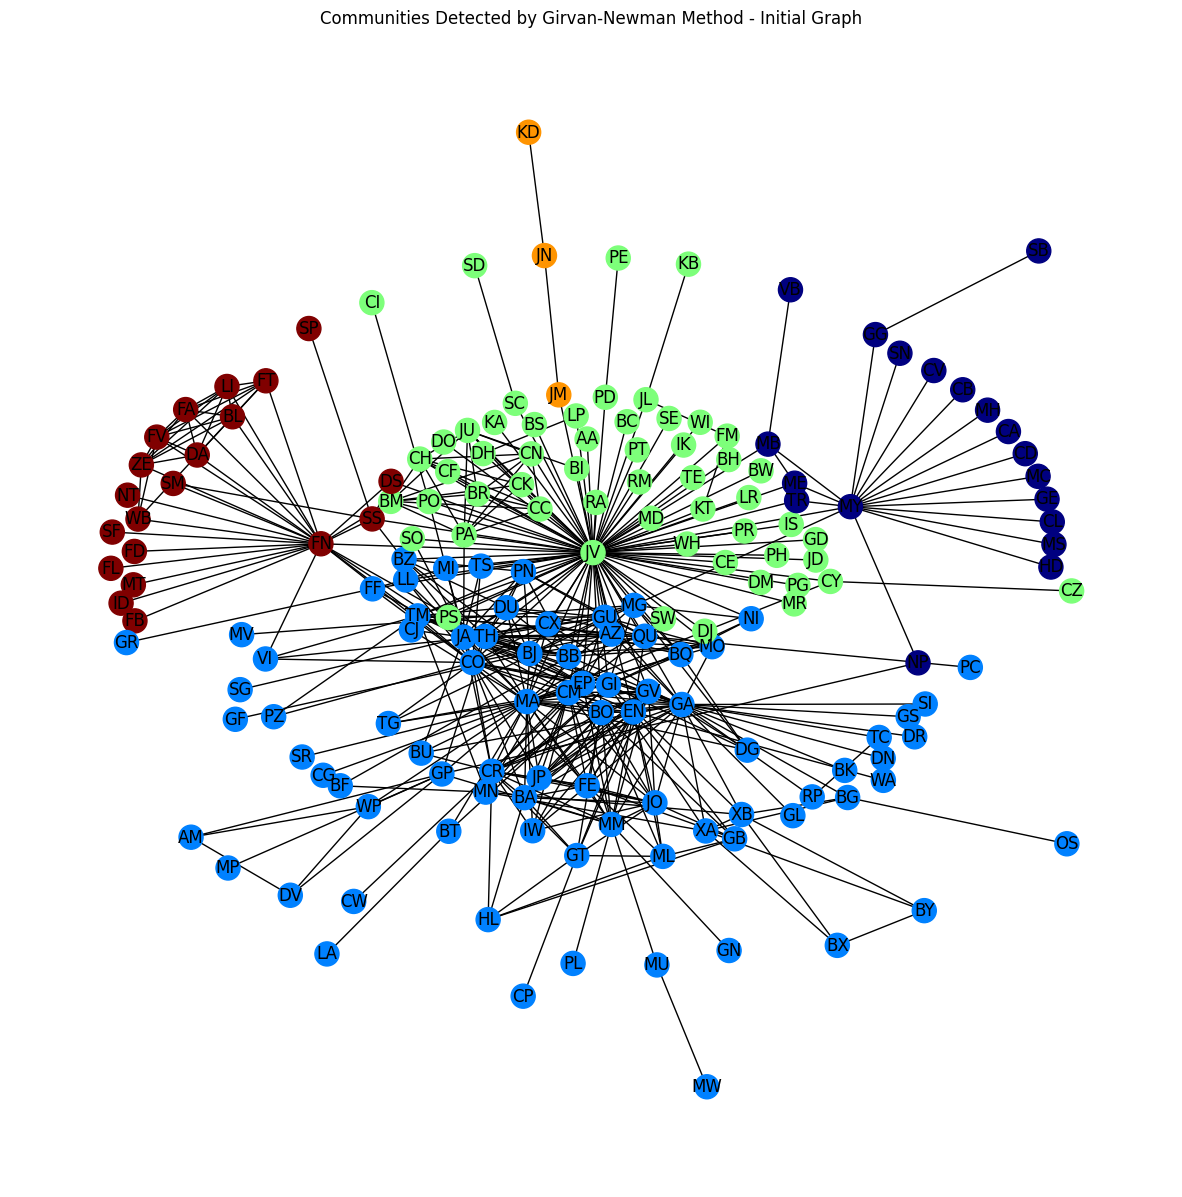

In [138]:
plot_communities(G, plotted_G_communities, title='Communities Detected by Girvan-Newman Method - Initial Graph')


**Barabasi Graph**

In [139]:
limited_BBA_G_communities = detect_communities(BBA_G)

2 ([0, 4, 7, 8, 9, 10, 11, 12, 14, 16, 17, 19, 20, 21, 24, 26, 28, 30, 33, 35, 36, 37, 39, 42, 43, 46, 47, 48, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 106, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 143, 144, 145, 147, 149, 150, 152, 155, 156, 157, 158, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179], [1, 2, 3, 5, 6, 13, 15, 18, 22, 23, 25, 27, 29, 31, 32, 34, 38, 40, 41, 44, 45, 49, 55, 67, 69, 70, 74, 83, 88, 89, 98, 100, 107, 108, 109, 114, 129, 136, 142, 146, 148, 151, 153, 154, 159, 160, 161, 174])
3 ([0, 4, 7, 8, 9, 10, 11, 12, 14, 16, 17, 19, 20, 21, 24, 26, 28, 30, 33, 35, 36, 37, 39, 43, 46, 47, 48, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 71, 72, 73, 75, 76, 77, 78, 79, 

In [140]:
plotted_BBA_G_communities = limited_BBA_G_communities[-1]

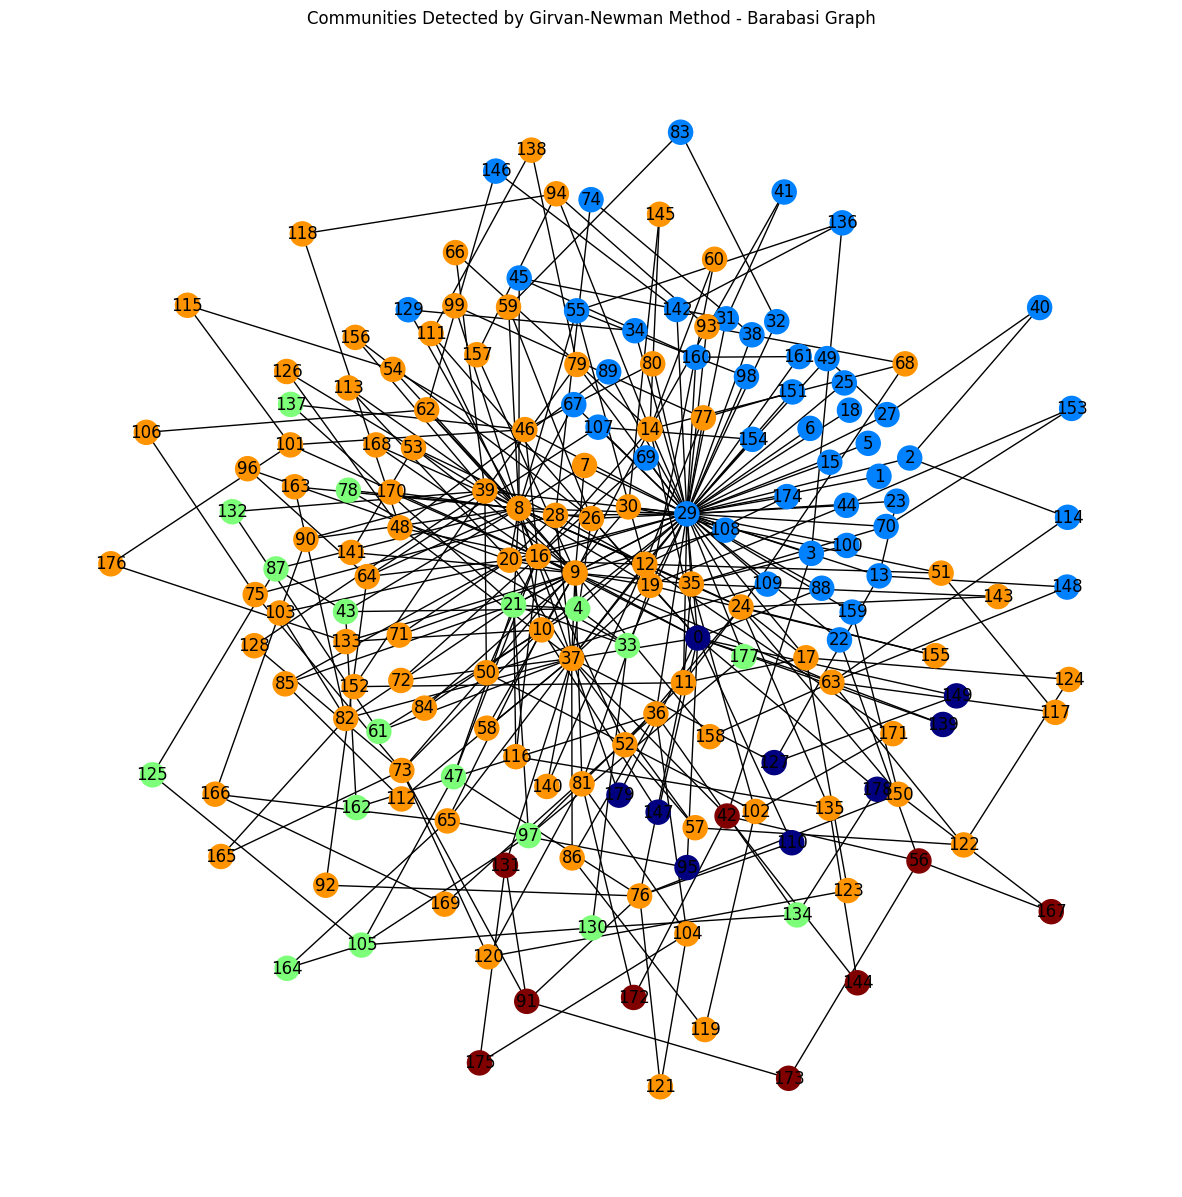

In [142]:
plot_communities(BBA_G, plotted_BBA_G_communities, title='Communities Detected by Girvan-Newman Method - Barabasi Graph')


# 3 - Προσομοίωση διάδοσης στο γράφο

In [98]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

## Επιλογή k-seeds με μέγιστη επιρροή

Plot the degree distribution to examine meaningfull degree threshold for top degree sampling

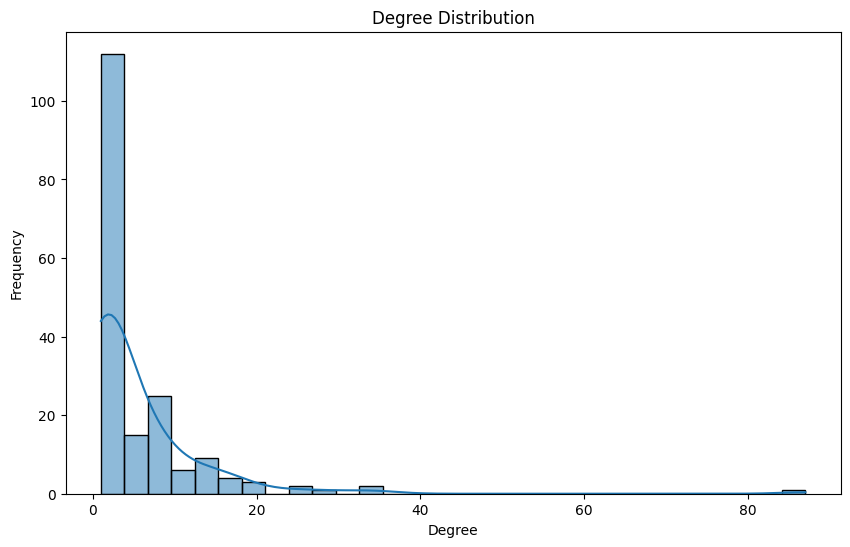

In [99]:
degrees = dict(nx.degree(G))
degree_values = list(degrees.values())

# Plot degree distribution
plt.figure(figsize=(10, 6))
sns.histplot(degree_values, bins=30, kde=True)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

Sort degrees and choose the min number of seeds with 60% influence from top degree nodes

In [100]:
def top_node_influence(graph, top_degree_num, threshold=0.4):
    # Choose top nodes
    node_degree_sorted = sorted(graph.degree, key=lambda x:x[-1], reverse=True)
    top_node_degrees = node_degree_sorted[:top_degree_num]
    top_nodes = [x[0] for x in top_node_degrees]

    # Examine and plot influence
    infected_nodes = top_nodes
    # Model selection
    model = ep.ThresholdModel(graph)
    config = mc.Configuration()

    config.add_model_initial_configuration("Infected", infected_nodes)
    for i in graph.nodes():
        config.add_node_configuration("threshold", i, threshold)
    model.set_initial_status(config)

    # Simulation execution
    iterations = model.iteration_bunch(100)
    trends = model.build_trends(iterations)
    viz = DiffusionTrend(model, trends)
    viz.plot()
    return top_nodes

Οπτικοποίηση Susceptible/Infected για την εύρεση του βέλτιστου πλήθος k-seeds ώστε να επιτύχουμε influence 60%

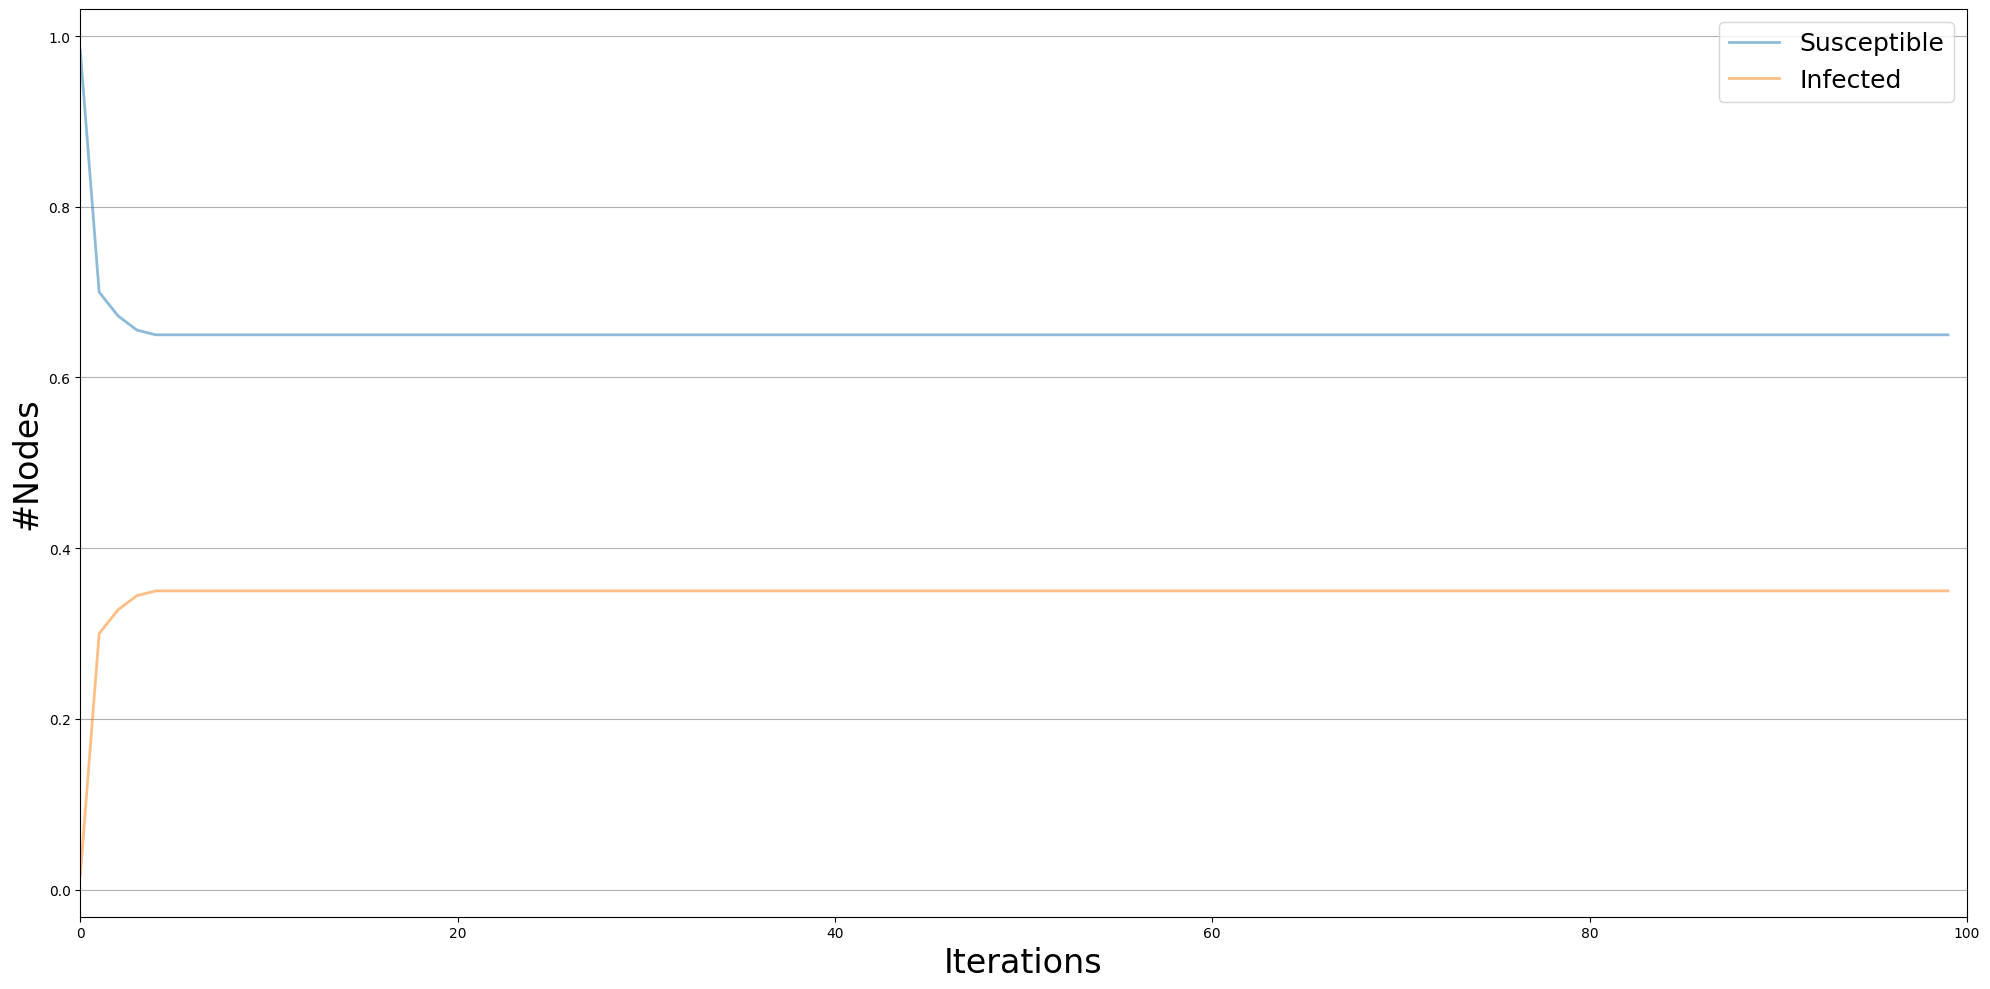


Top 3 seeds: ['JV', 'MA', 'GA']



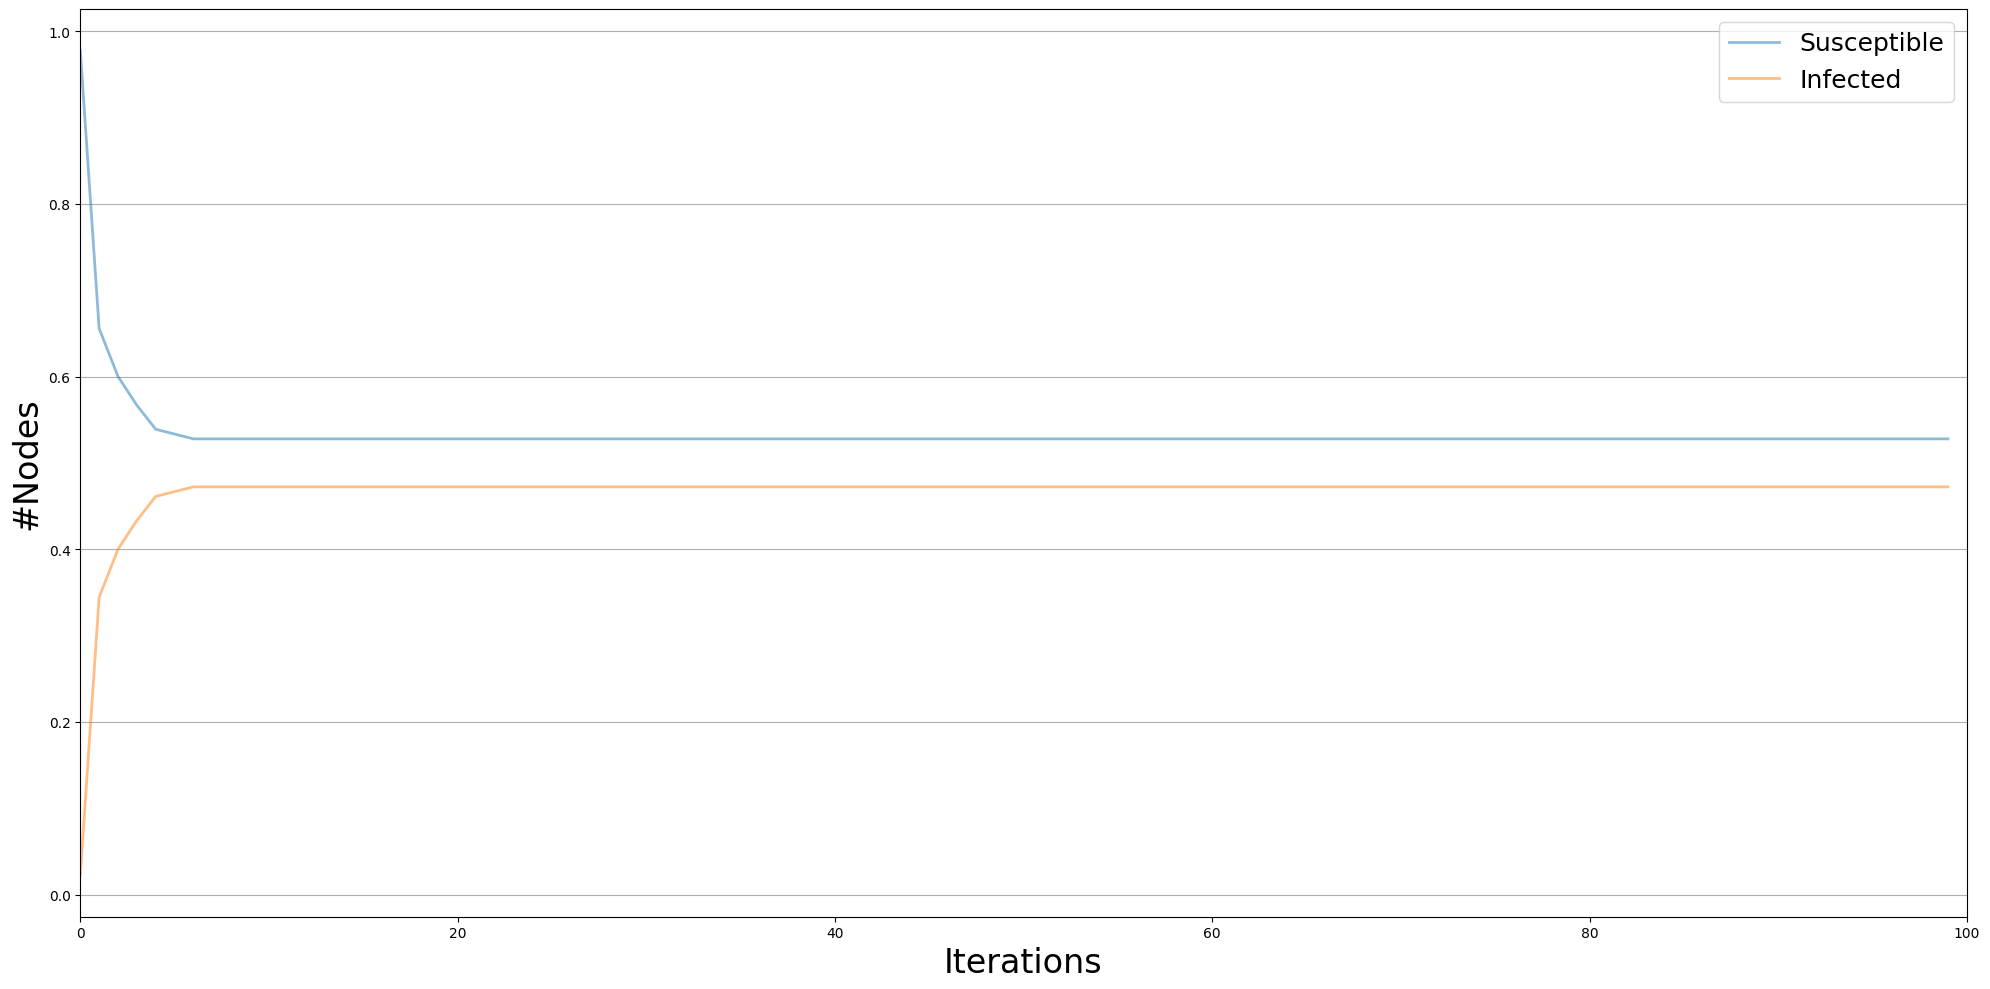


Top 4 seeds: ['JV', 'MA', 'GA', 'JA']



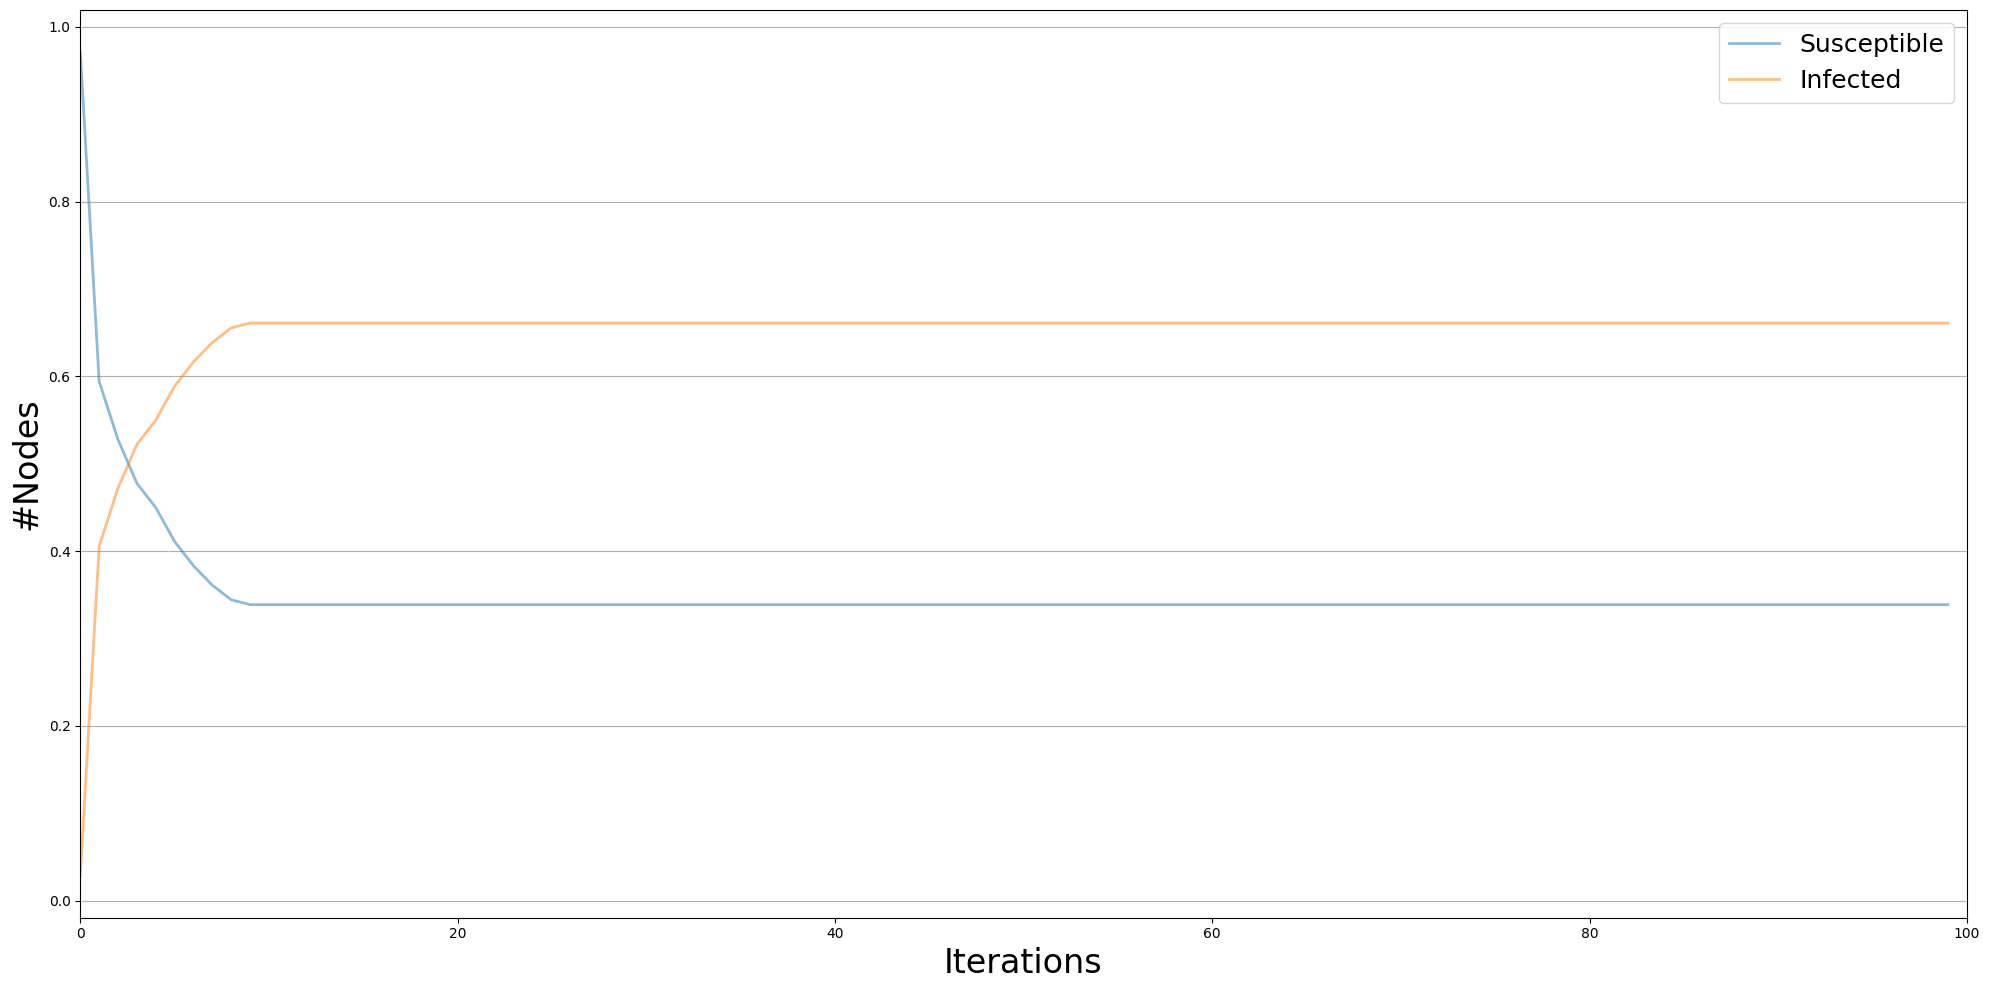


Top 5 seeds: ['JV', 'MA', 'GA', 'JA', 'FN']



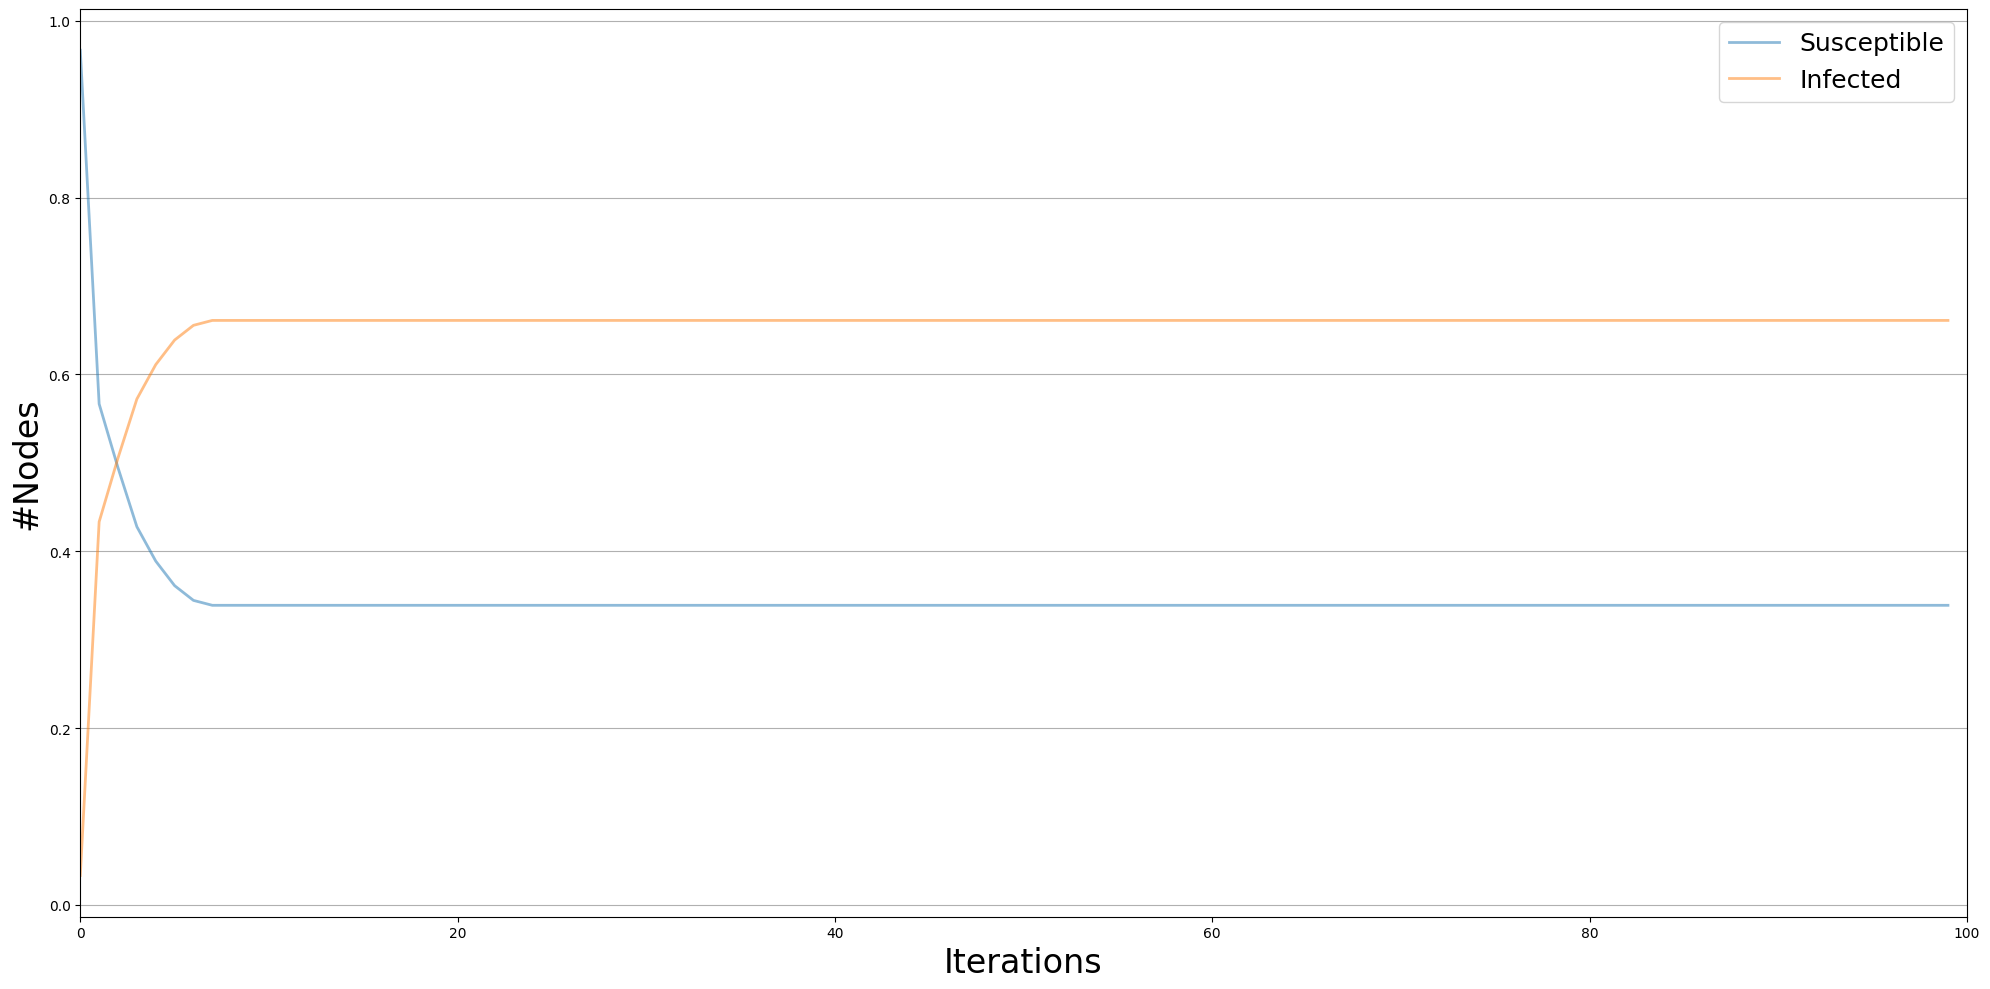


Top 6 seeds: ['JV', 'MA', 'GA', 'JA', 'FN', 'CO']



In [101]:
for top in range(3, 7):
    top_nodes = top_node_influence(G, top)
    print()
    print(f'Top {top} seeds: {top_nodes}')
    print()

Σύμφωνα με τα γραφήματα η βέλτιστη επιλογή είναι η `Top 5 seeds: ['JV', 'MA', 'GA', 'JA', 'FN']`